# **Présentation générale du data**

Cette table de données donne un aperçu des projets gagnants du Budget Participatif
depuis 2014.
Elle fournit une vue synthétique par projets gagnants de la vie des opérations durant les
étapes de leurs mises en œuvre jusqu’à leurs réalisations.
Chaque projet comprend un ensemble d’opérations réparties sur le territoire parisien.
Par exemple : le projet de l’édition 2014 « Coworking étudiants-entrepreneurs » se décline
en 17 opérations, toutes réalisées sur des sites différents, selon des temporalités
différentes (Cf. schéma explicatif n°1).
L’intérêt de cette table est de pouvoir suivre la mise en œuvre des projets gagnants
du Budget participatif, à partir des données internes à la Ville de Paris, régulièrement
actualisées et dont le niveau de détail offre une visibilité par opération. Ces informations
sont d’ailleurs utilisées pour alimenter le site internet du Budget participatif de Paris,
https://budgetparticipatif.paris.fr. Aussi, cette table est générée à partir
des données connues et indiquées par les services. On y trouve notamment
des renseignements sur le thème d’un projet, son année de vote, la direction
opérationnelle en charge de son pilotage, les opérations qui le structurent, des éléments
de localisation (projet/opération) ainsi que les dates correspondant aux diverses phases
d’avancement du projet et de ses opérations (cf. schéma explicatif n°2).


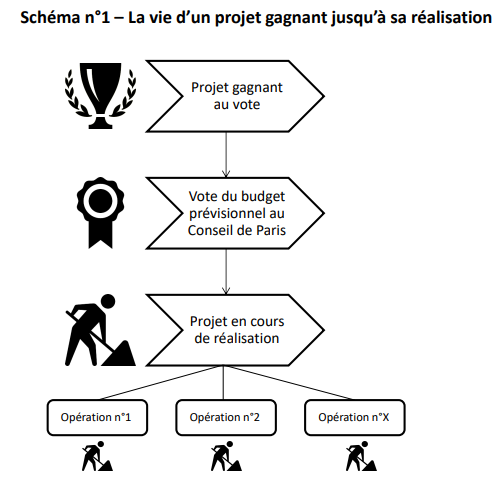

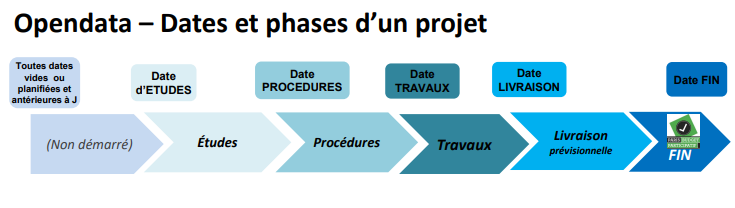

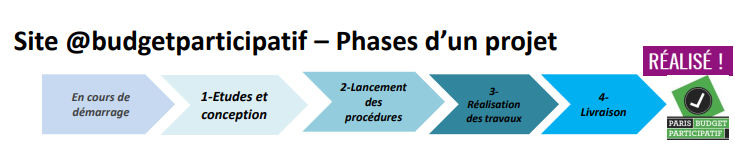

# 1.**L'importation du data + exploration initiale du data**

In [ ]:
# @title
import requests
import pandas as pd

# API endpoint
url = "https://opendata.paris.fr/api/records/1.0/search/?dataset=bp_projets_gagnants&rows=2000"

# Fetch data
response = requests.get(url)
data = response.json()

# Extract records
records = [record['fields'] for record in data['records']]

# Convert to DataFrame
df = pd.DataFrame(records)

# Show first rows
df.head()

,thematique,echelle_bp,lancement_procedure_projet,debut_etudes_projet,identifiant_projet_gagnant,projet_q_pop,adresse_projet_gagnant,arrondissement_projet_gagnant,budget_global_projet_gagnant,titre_projet_gagnant,lien_projet_gagnant,direction_pilote_projet,ouverture_projet,edition,avancement_projet,lancement_travaux_projet,livraison_prev_projet,lien_projet_soumis
0,Prévention et sécurité,Budget participatif d’arrondissement,2016-04,2016-02,1484,Non,Rue Saint-Jean,75017,320000,Piétonnisation de la rue Saint-Jean,https://decider.paris.fr/bp/jsp/site/Portal.js...,Direction de la Voirie et des Déplacements,2017-05,2015,FIN,2017-02,2017-04,NaN
1,Cadre de vie,Budget participatif d’arrondissement,2016-06,2016-04,1513,Non,23 Rue Greneta,75002,7000,Des ordinateurs pour les usagers de la Maison ...,https://decider.paris.fr/bp/jsp/site/Portal.js...,"Direction de la Démocratie, des Citoyens et de...",2016-12,2015,FIN,2016-10,2016-12,NaN
2,Cadre de vie,Budget participatif d’arrondissement,2016-03,2016-02,1641,Oui,Quai de l'Oise,75019,50000,Éclairage multicolore pour le canal de l'Ourcq,https://decider.paris.fr/bp/jsp/site/Portal.js...,Direction de la Voirie et des Déplacements,2016-08,2015,FIN,2016-07,2016-08,NaN
3,Cadre de vie,Budget participatif d’arrondissement,2016-11,2016-02,1821,Non,24 Rue de la Folie-Méricourt,75011,50000,Faciliter les déplacements piétons rue de la F...,https://decider.paris.fr/bp/jsp/site/Portal.js...,Direction de la Voirie et des Déplacements,2017-10,2015,FIN,2017-06,2017-10,NaN
4,Environnement,Budget participatif d’arrondissement,2019-06,2016-02,1887,Non,10 Boulevard de la Chapelle,75018,200000,Mieux éclairer le viaduc de la Ligne 2 du métr...,https://decider.paris.fr/bp/jsp/site/Portal.js...,Direction de la Voirie et des Déplacements,NaN,2015,TRAVAUX,2023-03,2025-12,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1444 entries, 0 to 1443
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   thematique                     1444 non-null   object
 1   echelle_bp                     1444 non-null   object
 2   lancement_procedure_projet     896 non-null    object
 3   debut_etudes_projet            1277 non-null   object
 4   identifiant_projet_gagnant     1444 non-null   int64 
 5   projet_q_pop                   1444 non-null   object
 6   adresse_projet_gagnant         1402 non-null   object
 7   arrondissement_projet_gagnant  1444 non-null   object
 8   budget_global_projet_gagnant   1444 non-null   int64 
 9   titre_projet_gagnant           1439 non-null   object
 10  lien_projet_gagnant            1444 non-null   object
 11  direction_pilote_projet        1444 non-null   object
 12  ouverture_projet               781 non-null    object
 13  edi



*   **On remarque qu'ilya des valeurs manquantes**



In [ ]:
df["thematique"].unique()

array(['Prévention et sécurité', 'Cadre de vie', 'Environnement', 'Sport',
       'Culture et patrimoine', 'Solidarités', 'Education et jeunesse',
       'Mobilités', 'Propreté', 'Santé', 'Attractivité et emploi'],
      dtype=object)

*   **La colonne thematique sert à classer les projets du budget participatif selon leur domaine d’action.**
1. **Prévention et sécurité** : projets visant à améliorer la sécurité des habitants, par exemple l’éclairage public, la prévention des risques, ou l’aménagement d’espaces plus sûrs.
2. **Cadre de vie** : projets qui améliorent la qualité de vie quotidienne, comme l’aménagement d’espaces publics, la création de lieux conviviaux ou la rénovation urbaine.
3. **Environnement** : projets liés à la protection de la nature, la biodiversité, les jardins partagés, les parcs et la transition écologique.
4. **Sport** : projets concernant les infrastructures sportives, terrains, gymnases, équipements pour favoriser la pratique du sport.
5. **Culture et patrimoine** : projets pour développer l’accès à la culture, soutenir les bibliothèques, musées, salles de spectacle, ou restaurer le patrimoine historique.
6. **Solidarités** : projets favorisant l’entraide et l’inclusion sociale, comme l’aide aux personnes vulnérables, l’accessibilité, ou les initiatives solidaires.
7. **Education et jeunesse** : projets destinés aux écoles, crèches, centres de jeunesse, activités éducatives et initiatives pour les jeunes.
8. **Mobilités** : projets liés aux déplacements et à la circulation, comme les pistes cyclables, les trottoirs, les transports doux et l’accessibilité.
9. **Propreté** : projets visant à améliorer la gestion des déchets, le nettoyage des espaces publics et la sensibilisation à la propreté urbaine.
10. **Santé** : projets pour renforcer l’accès aux soins, améliorer les équipements de santé ou promouvoir la prévention sanitaire.
11. **Attractivité et emploi** : projets destinés à dynamiser l’économie locale, favoriser l’emploi, soutenir les commerces et améliorer l’attractivité du territoire.






In [ ]:
df["echelle_bp"].unique()

array(['Budget participatif d’arrondissement',
       'Budget participatif parisien'], dtype=object)

*   **La colonne echelle_bp indique l’échelle territoriale du budget participatif auquel appartient le projet.**
1. **Budget participatif d’arrondissement** : projets réalisés à l’échelle d’un arrondissement, répondant à des besoins plus locaux et spécifiques aux habitants du quartier ou de l’arrondissement concerné.  
2. **Budget participatif parisien** : projets portés à l’échelle de toute la ville de Paris, avec un impact global et une portée plus large que les projets d’arrondissement.  

In [ ]:
df["projet_q_pop"].unique()

array(['Non', 'Oui'], dtype=object)

*   **La colonne projet_q_pop indique si le projet est lié à une question populaire soumise directement au vote citoyen.**
1. **Non** : le projet est un projet classique soumis par un citoyen ou une association, sans lien direct avec une question populaire.  
2. **Oui** : le projet est directement issu ou rattaché à une question populaire, c’est-à-dire une proposition soumise au vote de l’ensemble des habitants.  

In [ ]:
df["arrondissement_projet_gagnant"].unique()

array(['75017', '75002', '75019', '75011', '75018', '75012', '75009',
       '75004', '75007', '75020', '75005', '75014', '75015', '75013',
       '75116', '75016', '75001', '75123', '75010', '75006', '75008',
       '75003'], dtype=object)

*   **La colonne arrondissement_projet_gagnant indique l’arrondissement de Paris dans lequel le projet gagnant est localisé.**
1. **75017** : 17e arrondissement de Paris.  
2. **75002** : 2e arrondissement de Paris.  
3. **75019** : 19e arrondissement de Paris.  
4. **75011** : 11e arrondissement de Paris.  
5. **75018** : 18e arrondissement de Paris.  
6. **75012** : 12e arrondissement de Paris.  
7. **75009** : 9e arrondissement de Paris.  
8. **75004** : 4e arrondissement de Paris.  
9. **75007** : 7e arrondissement de Paris.  
10. **75020** : 20e arrondissement de Paris.  
11. **75005** : 5e arrondissement de Paris.  
12. **75014** : 14e arrondissement de Paris.  
13. **75015** : 15e arrondissement de Paris.  
14. **75013** : 13e arrondissement de Paris.  
15. **75116** : 16e arrondissement de Paris (code INSEE spécifique).  
16. **75016** : 16e arrondissement de Paris (autre code utilisé).  
17. **75001** : 1er arrondissement de Paris.  
18. **75123** : 23e division administrative spéciale de Paris (correspond à un secteur particulier).  
19. **75010** : 10e arrondissement de Paris.  
20. **75006** : 6e arrondissement de Paris.  
21. **75003** : 3e arrondissement de Paris.  
22. **75008** : 8e arrondissement de Paris.  

In [ ]:
df["direction_pilote_projet"].unique()

array(['Direction de la Voirie et des Déplacements',
       'Direction de la Démocratie, des Citoyens et des Territoires',
       'Direction de la Jeunesse et des Sports',
       'Direction des Affaires Culturelles',
       'Direction des Espaces Verts et de l’Environnement',
       'Direction de l’Attractivité et de l’Emploi',
       'Direction des Affaires Scolaires',
       'Direction Constructions Publiques et Architecture',
       'Direction de la Propreté et de l’Eau',
       "Centre d'Action Sociale de la Ville de Paris",
       'Direction de la Santé publique', 'Direction des Solidarités',
       'Direction des Familles et de la Petite Enfance',
       'Direction du Logement et de l’Habitat',
       'Secrétariat Général de la Ville de Paris',
       'Etablissement Public Paris Musées',
       'Direction de l’Immobilier, de la Logistique et des Transports',
       'Direction de la Transition Écologique et du Climat',
       'Direction de l’Urbanisme'], dtype=object)

*   **La colonne direction_pilote_projet indique la direction ou le service municipal responsable du suivi et de la mise en œuvre du projet.**
1. **Direction de la Voirie et des Déplacements** : responsable des projets liés aux routes, trottoirs, circulation et mobilités.  
2. **Direction de la Démocratie, des Citoyens et des Territoires** : en charge des projets favorisant la participation citoyenne et la démocratie locale.  
3. **Direction de la Jeunesse et des Sports** : pilote les projets concernant les infrastructures sportives et les initiatives pour la jeunesse.  
4. **Direction des Affaires Culturelles** : supervise les projets culturels, musées, bibliothèques et patrimoine artistique.  
5. **Direction des Espaces Verts et de l’Environnement** : responsable des projets liés aux parcs, jardins, biodiversité et environnement.  
6. **Direction de l’Attractivité et de l’Emploi** : en charge des projets visant à dynamiser l’économie locale et favoriser l’emploi.  
7. **Direction des Affaires Scolaires** : pilote les projets concernant les écoles, crèches et établissements scolaires.  
8. **Direction Constructions Publiques et Architecture** : supervise les projets de construction, rénovation et architecture publique.  
9. **Centre d'Action Sociale de la Ville de Paris** : gère les projets liés à l’aide sociale et à l’accompagnement des populations vulnérables.  
10. **Direction de la Santé publique** : responsable des projets liés à la santé, prévention et équipements médicaux.  
11. **Direction des Solidarités** : pilote les projets favorisant l’inclusion sociale et l’entraide.  
12. **Direction des Familles et de la Petite Enfance** : supervise les projets destinés aux familles, crèches et structures pour enfants.  
13. **Direction du Logement et de l’Habitat** : en charge des projets liés au logement, à l’habitat et à l’amélioration des conditions de vie.  
14. **Direction de la Propreté et de l’Eau** : responsable des projets concernant la gestion des déchets, la propreté urbaine et l’eau.  
15. **Secrétariat Général de la Ville de Paris** : assure la coordination générale et administrative des projets transversaux.  
16. **Etablissement Public Paris Musées** : pilote les projets liés aux musées et au patrimoine culturel parisien.  
17. **Direction de l’Immobilier, de la Logistique et des Transports** : supervise les projets immobiliers, logistiques et de transport interne.  
18. **Direction de la Transition Écologique et du Climat** : en charge des projets liés à la transition énergétique, écologique et climatique.  
19. **Direction de l’Urbanisme** : responsable des projets d’aménagement urbain, planification et développement territorial.  

In [ ]:
df["edition"].unique()

array(['2015', '2016', '2017', '2018', '2019', '2021', '2022', '2023',
       '2024', '2025', '2014'], dtype=object)



* **La période de notre dataset est de 2014 jusqu'au 2024**





# 2.**Nettoyage et stockage du data**

## 1.**Nettoyage du data**



*   **On supprime les deux colonnes contenant les liens car on n'a pas besoin de ces colonnes dans notre analyse**



In [ ]:
df = df.drop(columns=['lien_projet_gagnant', 'lien_projet_soumis'])
df.head()

,thematique,echelle_bp,lancement_procedure_projet,debut_etudes_projet,identifiant_projet_gagnant,projet_q_pop,adresse_projet_gagnant,arrondissement_projet_gagnant,budget_global_projet_gagnant,titre_projet_gagnant,direction_pilote_projet,ouverture_projet,edition,avancement_projet,lancement_travaux_projet,livraison_prev_projet
0,Prévention et sécurité,Budget participatif d’arrondissement,2016-04,2016-02,1484,Non,Rue Saint-Jean,75017,320000,Piétonnisation de la rue Saint-Jean,Direction de la Voirie et des Déplacements,2017-05,2015,FIN,2017-02,2017-04
1,Cadre de vie,Budget participatif d’arrondissement,2016-06,2016-04,1513,Non,23 Rue Greneta,75002,7000,Des ordinateurs pour les usagers de la Maison ...,"Direction de la Démocratie, des Citoyens et de...",2016-12,2015,FIN,2016-10,2016-12
2,Cadre de vie,Budget participatif d’arrondissement,2016-03,2016-02,1641,Oui,Quai de l'Oise,75019,50000,Éclairage multicolore pour le canal de l'Ourcq,Direction de la Voirie et des Déplacements,2016-08,2015,FIN,2016-07,2016-08
3,Cadre de vie,Budget participatif d’arrondissement,2016-11,2016-02,1821,Non,24 Rue de la Folie-Méricourt,75011,50000,Faciliter les déplacements piétons rue de la F...,Direction de la Voirie et des Déplacements,2017-10,2015,FIN,2017-06,2017-10
4,Environnement,Budget participatif d’arrondissement,2019-06,2016-02,1887,Non,10 Boulevard de la Chapelle,75018,200000,Mieux éclairer le viaduc de la Ligne 2 du métr...,Direction de la Voirie et des Déplacements,NaN,2015,TRAVAUX,2023-03,2025-12


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1444 entries, 0 to 1443
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   thematique                     1444 non-null   object
 1   echelle_bp                     1444 non-null   object
 2   lancement_procedure_projet     896 non-null    object
 3   debut_etudes_projet            1277 non-null   object
 4   identifiant_projet_gagnant     1444 non-null   int64 
 5   projet_q_pop                   1444 non-null   object
 6   adresse_projet_gagnant         1402 non-null   object
 7   arrondissement_projet_gagnant  1444 non-null   object
 8   budget_global_projet_gagnant   1444 non-null   int64 
 9   titre_projet_gagnant           1439 non-null   object
 10  direction_pilote_projet        1444 non-null   object
 11  ouverture_projet               781 non-null    object
 12  edition                        1444 non-null   object
 13  ava



*   **On convertit la colonne edition en valeur numérique et on fait un tri ascendant selon l'année**



In [ ]:
df['edition'] = pd.to_numeric(df['edition'])
df = df.sort_values(by='edition')
df.head()

,thematique,echelle_bp,lancement_procedure_projet,debut_etudes_projet,identifiant_projet_gagnant,projet_q_pop,adresse_projet_gagnant,arrondissement_projet_gagnant,budget_global_projet_gagnant,titre_projet_gagnant,direction_pilote_projet,ouverture_projet,edition,avancement_projet,lancement_travaux_projet,livraison_prev_projet
1028,Cadre de vie,Budget participatif parisien,2015-06,2015-01,2208,Oui,Place de l' Hotel de Ville - Esplanade de la L...,75004,1500000,Reconquête urbaine,"Direction de la Démocratie, des Citoyens et de...",2017-10,2014,FIN,2015-07,2017-10
1333,Cadre de vie,Budget participatif parisien,2018-04,2017-07,2204,Non,Place de l' Hotel de Ville - Esplanade de la L...,75004,1500000,NaN,Direction de la Voirie et des Déplacements,2020-02,2014,FIN,2018-01,2018-06
802,Cadre de vie,Budget participatif parisien,2015-03,2015-01,2205,Non,Place de l' Hotel de Ville - Esplanade de la L...,75004,3700000,Des kiosques pour faire la fête,Direction des Espaces Verts et de l’Environnement,2020-09,2014,FIN,2015-03,2015-04
681,Education et jeunesse,Budget participatif parisien,2015-03,2015-01,2207,Non,Place de l' Hotel de Ville - Esplanade de la L...,75004,1000000,Cultiver dans les écoles,Direction des Affaires Scolaires,2015-09,2014,FIN,2015-05,2015-07
484,Culture et patrimoine,Budget participatif parisien,2015-03,2015-01,2108,Non,Place de l' Hotel de Ville - Esplanade de la L...,75004,3000000,Les œuvres d'art investissent la rue,Direction des Affaires Culturelles,NaN,2014,LIVRAISON,2015-04,2015-05


*   **On va maintenant s'interesser aux valeurs manquantes du dataset commençant par la colonne ouverture_projet**

In [ ]:
df[df["ouverture_projet"].isna()]

,thematique,echelle_bp,lancement_procedure_projet,debut_etudes_projet,identifiant_projet_gagnant,projet_q_pop,adresse_projet_gagnant,arrondissement_projet_gagnant,budget_global_projet_gagnant,titre_projet_gagnant,direction_pilote_projet,ouverture_projet,edition,avancement_projet,lancement_travaux_projet,livraison_prev_projet
484,Culture et patrimoine,Budget participatif parisien,2015-03,2015-01,2108,Non,Place de l' Hotel de Ville - Esplanade de la L...,75004,3000000,Les œuvres d'art investissent la rue,Direction des Affaires Culturelles,NaN,2014,LIVRAISON,2015-04,2015-05
1074,Cadre de vie,Budget participatif d’arrondissement,NaN,NaN,1660,Non,Rue du Grenier Saint-Lazare,75003,8000,Végétalisation de la rue du Grenier-Saint-Lazare,Direction des Espaces Verts et de l’Environnement,NaN,2015,ABANDONNÉ,NaN,NaN
1070,Environnement,Budget participatif d’arrondissement,NaN,NaN,1482,Non,55 Rue Jouffroy d'Abbans,75017,60000,Des arbres rue Jouffroy d'Abbans,Direction de la Voirie et des Déplacements,NaN,2015,ABANDONNÉ,NaN,NaN
1153,Environnement,Budget participatif d’arrondissement,NaN,NaN,1927,Oui,13 Rue de Savies,75020,60000,Création d'un jardin potager à l'angle de la r...,Direction des Espaces Verts et de l’Environnement,NaN,2015,ABANDONNÉ,NaN,NaN
4,Environnement,Budget participatif d’arrondissement,2019-06,2016-02,1887,Non,10 Boulevard de la Chapelle,75018,200000,Mieux éclairer le viaduc de la Ligne 2 du métr...,Direction de la Voirie et des Déplacements,NaN,2015,TRAVAUX,2023-03,2025-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,Santé,Budget participatif parisien,NaN,2025-10,12446,Non,5 Rue de Lobau,75004,2000000,Protéger la santé et lutter contre les précarités,Direction des Espaces Verts et de l’Environnement,NaN,2025,ETUDES,NaN,NaN
67,Environnement,Budget participatif d’arrondissement,NaN,NaN,12320,Oui,31 Rue Péclet,75015,500000,Pour un éclairage intelligent et durable,Direction de la Voirie et des Déplacements,NaN,2025,(non démarré),NaN,NaN
66,Culture et patrimoine,Budget participatif d’arrondissement,NaN,NaN,12359,Non,61 Rue d'Amsterdam,75008,300000,Collège Condorcet : un collège classé à restaurer,Direction des Affaires Scolaires,NaN,2025,(non démarré),NaN,NaN
65,Education et jeunesse,Budget participatif d’arrondissement,NaN,NaN,12281,Non,72 Rue du Faubourg Saint-Martin,75010,70000,Installer plus de balançoires dans les jardins...,Direction des Espaces Verts et de l’Environnement,NaN,2025,(non démarré),NaN,NaN


In [ ]:
df[df["ouverture_projet"].isna() & df["avancement_projet"]=="Fin"]

,thematique,echelle_bp,lancement_procedure_projet,debut_etudes_projet,identifiant_projet_gagnant,projet_q_pop,adresse_projet_gagnant,arrondissement_projet_gagnant,budget_global_projet_gagnant,titre_projet_gagnant,direction_pilote_projet,ouverture_projet,edition,avancement_projet,lancement_travaux_projet,livraison_prev_projet


*   **On remarque que les Nans dans ouverture projet sont à cause que le projet n'est pas encore terminé et c'est tout à fait logique donc on va remplacer ces nans par string "Non ouvert"**

In [ ]:
df['ouverture_projet'] = df['ouverture_projet'].fillna('Non ouvert')

*   **On va vérifier les options abondonné et (non démarré) du variable avancement de projet car il est possible que certaines dates manquantes viennent de ces options**

In [ ]:
df[df["avancement_projet"]=="ABANDONNÉ"]

,thematique,echelle_bp,lancement_procedure_projet,debut_etudes_projet,identifiant_projet_gagnant,projet_q_pop,adresse_projet_gagnant,arrondissement_projet_gagnant,budget_global_projet_gagnant,titre_projet_gagnant,direction_pilote_projet,ouverture_projet,edition,avancement_projet,lancement_travaux_projet,livraison_prev_projet
1074,Cadre de vie,Budget participatif d’arrondissement,NaN,NaN,1660,Non,Rue du Grenier Saint-Lazare,75003,8000,Végétalisation de la rue du Grenier-Saint-Lazare,Direction des Espaces Verts et de l’Environnement,Non ouvert,2015,ABANDONNÉ,NaN,NaN
1070,Environnement,Budget participatif d’arrondissement,NaN,NaN,1482,Non,55 Rue Jouffroy d'Abbans,75017,60000,Des arbres rue Jouffroy d'Abbans,Direction de la Voirie et des Déplacements,Non ouvert,2015,ABANDONNÉ,NaN,NaN
1153,Environnement,Budget participatif d’arrondissement,NaN,NaN,1927,Oui,13 Rue de Savies,75020,60000,Création d'un jardin potager à l'angle de la r...,Direction des Espaces Verts et de l’Environnement,Non ouvert,2015,ABANDONNÉ,NaN,NaN
76,Cadre de vie,Budget participatif d’arrondissement,NaN,NaN,1673,Non,2 Rue Eugène Spuller,75003,10000,Végétalisation d'un mur rue au Maire / rue Bea...,Direction des Espaces Verts et de l’Environnement,Non ouvert,2015,ABANDONNÉ,NaN,NaN
778,Sport,Budget participatif d’arrondissement,NaN,NaN,1537,Non,1 Place d'Italie,75013,8000,Des aménagements sportifs (Street workout) sur...,Direction de la Jeunesse et des Sports,Non ouvert,2015,ABANDONNÉ,NaN,NaN
583,Cadre de vie,Budget participatif d’arrondissement,NaN,NaN,1509,Non,16 Rue de la Lune,75002,15000,Fresque dans le square Bidault,Direction des Affaires Culturelles,Non ouvert,2015,ABANDONNÉ,NaN,NaN
586,Cadre de vie,Budget participatif d’arrondissement,NaN,NaN,1692,Non,21 Place du Panthéon,75005,15000,Piétonnisation du quartier Saint-Séverin,Direction de la Voirie et des Déplacements,Non ouvert,2015,ABANDONNÉ,NaN,NaN
146,Cadre de vie,Budget participatif d’arrondissement,NaN,NaN,1445,Non,Passage Legendre,75017,100000,Végétalisation du passage Legendre,Direction des Espaces Verts et de l’Environnement,Non ouvert,2015,ABANDONNÉ,NaN,NaN
1288,Environnement,Budget participatif d’arrondissement,NaN,NaN,1360,Non,Pont Saint-Louis,75004,16000,Végétaliser le pont Saint-Louis,Direction des Espaces Verts et de l’Environnement,Non ouvert,2015,ABANDONNÉ,NaN,NaN
298,Culture et patrimoine,Budget participatif d’arrondissement,NaN,NaN,1835,Non,Place du Trocadéro et du Onze Novembre,75116,100000,Réinstaller la lanterne du Trocadéro sur la co...,Direction des Espaces Verts et de l’Environnement,Non ouvert,2015,ABANDONNÉ,NaN,NaN


In [ ]:
df[df["avancement_projet"]=="(non démarré)"]

,thematique,echelle_bp,lancement_procedure_projet,debut_etudes_projet,identifiant_projet_gagnant,projet_q_pop,adresse_projet_gagnant,arrondissement_projet_gagnant,budget_global_projet_gagnant,titre_projet_gagnant,direction_pilote_projet,ouverture_projet,edition,avancement_projet,lancement_travaux_projet,livraison_prev_projet
369,Cadre de vie,Budget participatif d’arrondissement,NaN,NaN,2560,Oui,2 Rue Polonceau,75018,22500,Embellissement de la place entre les rues de l...,Direction des Affaires Culturelles,Non ouvert,2016,(non démarré),NaN,NaN
1080,Cadre de vie,Budget participatif d’arrondissement,NaN,NaN,2896,Non,318 Rue Saint-Jacques,75005,20000,Végétalisation du mur aveugle du 318 rue Saint...,Direction des Espaces Verts et de l’Environnement,Non ouvert,2016,(non démarré),NaN,NaN
1083,Culture et patrimoine,Budget participatif d’arrondissement,NaN,NaN,3574,Oui,56 rue des Cendriers,75020,900000,Rénovation de l'amphithéâtre du jardin des Ama...,Direction des Affaires Culturelles,Non ouvert,2017,(non démarré),NaN,NaN
1101,Education et jeunesse,Budget participatif d’arrondissement,NaN,NaN,6092,Non,13 rue Charlemagne,75004,350000,Amélioration de la cour du Collège Charlemagne,Direction des Affaires Scolaires,Non ouvert,2018,(non démarré),NaN,NaN
1027,Sport,Budget participatif d’arrondissement,NaN,NaN,6334,Non,5 place Paul Verlaine,75013,900000,Modernisation de la piscine de la Butte-aux-Ca...,Direction de la Jeunesse et des Sports,Non ouvert,2018,(non démarré),NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,Mobilités,Budget participatif d’arrondissement,NaN,NaN,12317,Non,2 Place Ferdinand Brunot,75014,520000,Tendre vers une accessibilité totale des bus d...,Direction de la Voirie et des Déplacements,Non ouvert,2025,(non démarré),NaN,NaN
67,Environnement,Budget participatif d’arrondissement,NaN,NaN,12320,Oui,31 Rue Péclet,75015,500000,Pour un éclairage intelligent et durable,Direction de la Voirie et des Déplacements,Non ouvert,2025,(non démarré),NaN,NaN
66,Culture et patrimoine,Budget participatif d’arrondissement,NaN,NaN,12359,Non,61 Rue d'Amsterdam,75008,300000,Collège Condorcet : un collège classé à restaurer,Direction des Affaires Scolaires,Non ouvert,2025,(non démarré),NaN,NaN
65,Education et jeunesse,Budget participatif d’arrondissement,NaN,NaN,12281,Non,72 Rue du Faubourg Saint-Martin,75010,70000,Installer plus de balançoires dans les jardins...,Direction des Espaces Verts et de l’Environnement,Non ouvert,2025,(non démarré),NaN,NaN


*   **Oui notre logique est correcte c'es deux options portent des valeurs manquantes au niveau des dates donc on doit les traiter**

In [ ]:
df["avancement_projet"] = df["avancement_projet"].replace("(non démarré)", "NON DEMARRE")

*   **Pour les options ABANDONNÉ et NON DEMARRE on va remplacer les nans aux niveaux des dates par des textes plus significatives**

In [ ]:
replacement_map = {
    'lancement_procedure_projet': 'NON LANCÉE',
    'debut_etudes_projet': 'NON DÉMARRÉES',
    'lancement_travaux_projet': 'NON LANCÉS',
    'livraison_prev_projet': 'NON PRÉVUE'
}
for col, replacement in replacement_map.items():
    mask = ((df["avancement_projet"] == "ABANDONNÉ") | (df["avancement_projet"] == "NON DEMARRE")) & (df[col].isna())
    df.loc[mask, col] = replacement

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1444 entries, 1028 to 64
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   thematique                     1444 non-null   object
 1   echelle_bp                     1444 non-null   object
 2   lancement_procedure_projet     1055 non-null   object
 3   debut_etudes_projet            1433 non-null   object
 4   identifiant_projet_gagnant     1444 non-null   int64 
 5   projet_q_pop                   1444 non-null   object
 6   adresse_projet_gagnant         1402 non-null   object
 7   arrondissement_projet_gagnant  1444 non-null   object
 8   budget_global_projet_gagnant   1444 non-null   int64 
 9   titre_projet_gagnant           1439 non-null   object
 10  direction_pilote_projet        1444 non-null   object
 11  ouverture_projet               1444 non-null   object
 12  edition                        1444 non-null   int64 
 13  avancem

*   **il existe encore des valeurs manquantes surtout au niveau lancement_procedure_projet**

In [ ]:
df[df["lancement_procedure_projet"].isna()]

,thematique,echelle_bp,lancement_procedure_projet,debut_etudes_projet,identifiant_projet_gagnant,projet_q_pop,adresse_projet_gagnant,arrondissement_projet_gagnant,budget_global_projet_gagnant,titre_projet_gagnant,direction_pilote_projet,ouverture_projet,edition,avancement_projet,lancement_travaux_projet,livraison_prev_projet
1233,Cadre de vie,Budget participatif d’arrondissement,NaN,2016-12,2525,Non,5-7 Place Armand Carrel,75019,50000,Plus d’aménagements vélos pour petit-e-s et gr...,Direction de la Voirie et des Déplacements,2019-10,2016,FIN,2018-11,2019-10
1230,Culture et patrimoine,Budget participatif d’arrondissement,NaN,2017-01,2723,Non,12 Place Léon Blum,75011,10000,L'arbre à livres,Direction de l’Attractivité et de l’Emploi,Non ouvert,2016,ETUDES,NaN,NaN
661,Cadre de vie,Budget participatif d’arrondissement,NaN,2017-02,2518,Non,Rue Eugène Jumin,75019,650000,"La rue Eugène Jumin, un trait d'union entre de...",Direction de la Voirie et des Déplacements,2019-10,2016,FIN,2019-04,2019-10
537,Cadre de vie,Budget participatif d’arrondissement,NaN,2017-05,2886,Oui,5-7 Place Armand Carrel,75019,400000,Réaménager des trottoirs des quartiers Pont de...,Direction de la Voirie et des Déplacements,2020-10,2016,FIN,2019-07,2019-08
525,Mobilités,Budget participatif d’arrondissement,NaN,2018-02,2778,Oui,Rue Oberkampf,75011,140000,Mise à double sens de la rue Oberkampf pour le...,Direction de la Voirie et des Déplacements,2024-06,2016,FIN,NaN,2024-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,Propreté,Budget participatif d’arrondissement,NaN,2025-11,12374,Non,2 Rue Eugène Spuller,75003,120000,Renforcer le mobilier urbain pour davantage de...,Direction de la Propreté et de l’Eau,Non ouvert,2025,ETUDES,NaN,NaN
143,Sport,Budget participatif d’arrondissement,NaN,2025-11,12417,Oui,1 Place Jules Joffrin,75018,320000,"Encourager les pratiques sportives, pour tous ...",Direction de la Jeunesse et des Sports,Non ouvert,2025,ETUDES,NaN,NaN
142,Environnement,Budget participatif d’arrondissement,NaN,2025-10,12416,Oui,1 Place Jules Joffrin,75018,870000,Fleurir les rues et sensibiliser à la nature e...,Direction des Espaces Verts et de l’Environnement,Non ouvert,2025,ETUDES,NaN,NaN
69,Propreté,Budget participatif d’arrondissement,NaN,2025-11,12369,Non,21 Place du Panthéon,75005,130000,Faciliter le tri des déchets et lutter contre ...,Direction de la Propreté et de l’Eau,Non ouvert,2025,ETUDES,NaN,NaN


*   **Pour les options FIN et LIVRAISON les dates manquantes ne sont pas registres donc on va les remplacer par NON REGISTRE**

In [ ]:
replacement_map = {
    'lancement_procedure_projet': 'NON REGISTRE',
    'debut_etudes_projet': 'NON REGISTRE',
    'lancement_travaux_projet': 'NON REGISTRE',
    'livraison_prev_projet': 'NON REGISTRE'
}
for col, replacement in replacement_map.items():
    mask = ((df["avancement_projet"] == "FIN") | (df["avancement_projet"] == "LIVRAISON")) & (df[col].isna())
    df.loc[mask, col] = replacement


*   **Pour les autres options dont où le projet est en premiéres étapes il est probable que ces dates ne sont pas encores fixes donc on va les remplacer par NON ENCORE FIXES**

In [ ]:
replacement_map = {
    'lancement_procedure_projet': 'NON ENCORE FIXE',
    'debut_etudes_projet': 'NON ENCORE FIXE',
    'lancement_travaux_projet': 'NON ENCORE FIXE',
    'livraison_prev_projet': 'NON ENCORE FIXE'
}

for col, replacement in replacement_map.items():
    mask = ((df["avancement_projet"] == "TRAVAUX") | (df["avancement_projet"] == "ETUDES") | (df["avancement_projet"] == "PROCEDURES")) & (df[col].isna())
    df.loc[mask, col] = replacement

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1444 entries, 1028 to 64
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   thematique                     1444 non-null   object
 1   echelle_bp                     1444 non-null   object
 2   lancement_procedure_projet     1444 non-null   object
 3   debut_etudes_projet            1444 non-null   object
 4   identifiant_projet_gagnant     1444 non-null   int64 
 5   projet_q_pop                   1444 non-null   object
 6   adresse_projet_gagnant         1402 non-null   object
 7   arrondissement_projet_gagnant  1444 non-null   object
 8   budget_global_projet_gagnant   1444 non-null   int64 
 9   titre_projet_gagnant           1439 non-null   object
 10  direction_pilote_projet        1444 non-null   object
 11  ouverture_projet               1444 non-null   object
 12  edition                        1444 non-null   int64 
 13  avancem

*   **il reste quelques valeurs manquantes dans l'adresse et le nom des projets**

In [ ]:
df[df["adresse_projet_gagnant"].isna()]

,thematique,echelle_bp,lancement_procedure_projet,debut_etudes_projet,identifiant_projet_gagnant,projet_q_pop,adresse_projet_gagnant,arrondissement_projet_gagnant,budget_global_projet_gagnant,titre_projet_gagnant,direction_pilote_projet,ouverture_projet,edition,avancement_projet,lancement_travaux_projet,livraison_prev_projet
980,Propreté,Budget participatif parisien,2023-05,2021-10,9926,Non,NaN,75004,3000000,Agir pour une ville plus propre,Direction de la Propreté et de l’Eau,Non ouvert,2021,LIVRAISON,2022-04,2022-12
1138,Environnement,Budget participatif parisien,2022-12,2022-12,9929,Non,NaN,75004,5000000,S’adapter aux effets du réchauffement climatiq...,Direction de la Transition Écologique et du Cl...,Non ouvert,2021,LIVRAISON,2023-02,2023-12
197,Environnement,Budget participatif d’arrondissement,2023-08,2022-10,10553,Non,NaN,75019,1810000,Rafraichir la ville et promouvoir la biodiversité,Direction des Espaces Verts et de l’Environnement,Non ouvert,2022,LIVRAISON,2023-09,2025-06
824,Education et jeunesse,Budget participatif d’arrondissement,NON ENCORE FIXE,2022-10,10497,Oui,NaN,75013,2000000,Modernisation et rénovation de vos Centres Par...,Direction de la Jeunesse et des Sports,Non ouvert,2022,TRAVAUX,2023-06,NON ENCORE FIXE
1268,Education et jeunesse,Budget participatif d’arrondissement,2024-01,2022-10,10644,Oui,NaN,75020,360000,Des projets pour la jeunesse du 20e,"Direction de la Démocratie, des Citoyens et de...",Non ouvert,2022,TRAVAUX,2024-11,NON ENCORE FIXE
1354,Solidarités,Budget participatif d’arrondissement,NON REGISTRE,2022-11,10578,Oui,NaN,75018,380000,Lutter contre les inégalités d’accès,Direction des Solidarités,Non ouvert,2022,LIVRAISON,NON REGISTRE,2024-06
897,Cadre de vie,Budget participatif d’arrondissement,NON ENCORE FIXE,2022-10,10645,Non,NaN,75008,1330000,"Apaiser, végétaliser des rues et places de l'a...",Direction de la Voirie et des Déplacements,Non ouvert,2022,ETUDES,NON ENCORE FIXE,2025-12
896,Environnement,Budget participatif d’arrondissement,2023-06,2022-11,10589,Non,NaN,75014,950000,Adoucir et rafraîchir les espaces verts du 14e,Direction des Espaces Verts et de l’Environnement,Non ouvert,2022,LIVRAISON,2023-09,2023-09
335,Sport,Budget participatif d’arrondissement,2022-10,2022-10,10562,Oui,NaN,75019,2000000,Modernisons nos équipements pour faire du spor...,Direction de la Jeunesse et des Sports,Non ouvert,2022,LIVRAISON,2023-06,2023-11
895,Solidarités,Budget participatif d’arrondissement,2023-03,2022-10,10561,Oui,NaN,75019,960000,Soutenons le dynamisme associatif et solidaire...,Direction des Solidarités,Non ouvert,2022,LIVRAISON,2023-01,2024-01


*   **On va remplacer ces valeurs par NON REGISTRE**

In [ ]:
df["adresse_projet_gagnant"] = df["adresse_projet_gagnant"].fillna("NON REGISTRE")
df["titre_projet_gagnant"] = df["titre_projet_gagnant"].fillna("NON REGISTRÉ")


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1444 entries, 1028 to 64
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   thematique                     1444 non-null   object
 1   echelle_bp                     1444 non-null   object
 2   lancement_procedure_projet     1444 non-null   object
 3   debut_etudes_projet            1444 non-null   object
 4   identifiant_projet_gagnant     1444 non-null   int64 
 5   projet_q_pop                   1444 non-null   object
 6   adresse_projet_gagnant         1444 non-null   object
 7   arrondissement_projet_gagnant  1444 non-null   object
 8   budget_global_projet_gagnant   1444 non-null   int64 
 9   titre_projet_gagnant           1444 non-null   object
 10  direction_pilote_projet        1444 non-null   object
 11  ouverture_projet               1444 non-null   object
 12  edition                        1444 non-null   int64 
 13  avancem

*   **Et voila on a bien traiter les valeurs manquantes !**

In [ ]:
df.head()

,thematique,echelle_bp,lancement_procedure_projet,debut_etudes_projet,identifiant_projet_gagnant,projet_q_pop,adresse_projet_gagnant,arrondissement_projet_gagnant,budget_global_projet_gagnant,titre_projet_gagnant,direction_pilote_projet,ouverture_projet,edition,avancement_projet,lancement_travaux_projet,livraison_prev_projet
1028,Cadre de vie,Budget participatif parisien,2015-06,2015-01,2208,Oui,Place de l' Hotel de Ville - Esplanade de la L...,75004,1500000,Reconquête urbaine,"Direction de la Démocratie, des Citoyens et de...",2017-10,2014,FIN,2015-07,2017-10
1333,Cadre de vie,Budget participatif parisien,2018-04,2017-07,2204,Non,Place de l' Hotel de Ville - Esplanade de la L...,75004,1500000,NON REGISTRÉ,Direction de la Voirie et des Déplacements,2020-02,2014,FIN,2018-01,2018-06
802,Cadre de vie,Budget participatif parisien,2015-03,2015-01,2205,Non,Place de l' Hotel de Ville - Esplanade de la L...,75004,3700000,Des kiosques pour faire la fête,Direction des Espaces Verts et de l’Environnement,2020-09,2014,FIN,2015-03,2015-04
681,Education et jeunesse,Budget participatif parisien,2015-03,2015-01,2207,Non,Place de l' Hotel de Ville - Esplanade de la L...,75004,1000000,Cultiver dans les écoles,Direction des Affaires Scolaires,2015-09,2014,FIN,2015-05,2015-07
484,Culture et patrimoine,Budget participatif parisien,2015-03,2015-01,2108,Non,Place de l' Hotel de Ville - Esplanade de la L...,75004,3000000,Les œuvres d'art investissent la rue,Direction des Affaires Culturelles,Non ouvert,2014,LIVRAISON,2015-04,2015-05


## 2.**Stockage du data aprés nettoyage dans une base de données utilisant sqllite**

In [ ]:
import sqlite3

# Créer une connexion à la base de données SQLite
conn = sqlite3.connect('bp_projects.db')

# Stocker le DataFrame dans une table SQLite
df.to_sql('projects', conn, if_exists='replace', index=False)

# Fermer la connexion à la base de données
conn.close()

print("Le DataFrame a été stocké avec succès dans 'bp_projects.db' dans la table 'projects'.")

Le DataFrame a été stocké avec succès dans 'bp_projects.db' dans la table 'projects'.


# 3.**Analyses statistiques**

## 3.1. **Répartition des projets par thématiques**

In [ ]:
df["thematique"].value_counts()

,count
thematique,
Cadre de vie,356
Education et jeunesse,242
Environnement,214
Culture et patrimoine,163
Solidarités,149
Sport,143
Mobilités,57
Prévention et sécurité,55
Propreté,36


*  **Ici, on voit clairement que les thématiques Cadre de vie, Education et jeunesse, et Environnement concentrent le plus grand nombre de projets, tandis que Santé et Attractivité et emploi sont les moins représentées.**



## 3.2. **Répartition des projets par echelle budget participatif**

In [ ]:
df["echelle_bp"].value_counts()

,count
echelle_bp,
Budget participatif d’arrondissement,1375
Budget participatif parisien,69




*   **La participation citoyenne se concentre surtout sur des projets de proximité (arrondissements).**
*   **Les projets parisiens existent mais représentent une part beaucoup plus faible, car ils nécessitent des budgets plus importants et touchent l’ensemble de la ville.**



## 3.3.**Répartition des projets par type de direction pilote projet**


In [ ]:
df["direction_pilote_projet"].value_counts()

,count
direction_pilote_projet,
Direction des Espaces Verts et de l’Environnement,329
Direction de la Voirie et des Déplacements,306
Direction des Affaires Scolaires,210
Direction de la Jeunesse et des Sports,152
Direction des Affaires Culturelles,144
"Direction de la Démocratie, des Citoyens et des Territoires",68
Direction des Solidarités,65
Direction de l’Attractivité et de l’Emploi,63
Direction de la Propreté et de l’Eau,29




*   **Les projets sont dominés par trois grands axes : **Environnement**, **Mobilité/voirie**, et **Éducation/jeunesse**.**
*   **Les thématiques sociales (solidarité, emploi, démocratie) sont présentes mais moins nombreuses.**
* **Les directions liées à la santé, au logement ou aux musées apparaissent marginales, ce qui reflète une moindre demande citoyenne dans ces domaines.**   







## 3.4.**Répartition des projets par avancement**

In [ ]:
df["avancement_projet"].value_counts()

,count
avancement_projet,
FIN,779
LIVRAISON,182
ETUDES,169
NON DEMARRE,105
TRAVAUX,95
PROCEDURES,58
ABANDONNÉ,56


*   **Plus de la moitié des projets sont **déjà terminés (FIN)**, ce qui montre une bonne concrétisation.**
*   **Une part significative est en **livraison ou en travaux**, donc en cours d’achèvement.**
*   **Les projets en **études ou procédures** représentent les étapes préparatoires.**
*   **Les projets **abandonnés ou non démarrés** restent minoritaires, mais ils traduisent les limites ou obstacles rencontrés.**



## 3.5.**Analyses statistiques : budgé des projets participatifs**

In [ ]:
df["budget_global_projet_gagnant"].describe().round(2)

,budget_global_projet_gagnant
count,1444.00
mean,588818.36
std,880526.65
min,1000.00
25%,80000.00
50%,300000.00
75%,700000.00
max,8000000.00


*   **La colonne budget_global_projet_gagnant indique le montant total alloué au projet gagnant (en euros).**

*   **Analyse statistique :**
1. **count = 1341** : nombre total de projets avec un budget renseigné.  
2. **mean = 572 724,61 €** : budget moyen par projet, tiré vers le haut par quelques projets très coûteux.  
3. **std = 886 429,58 €** : écart-type élevé, montrant une forte dispersion des budgets.  
4. **min = 1 000 €** : projet le moins coûteux, très modeste.  
5. **25% = 70 000 €** : un quart des projets ont un budget inférieur ou égal à 70 000 €.  
6. **50% (médiane) = 264 000 €** : la moitié des projets ont un budget ≤ 264 000 €, ce qui reflète des projets de taille moyenne.  
7. **75% = 650 000 €** : trois quarts des projets ont un budget ≤ 650 000 €, au-delà ce sont des grands projets.  
8. **max = 8 000 000 €** : projet le plus coûteux, exceptionnel, expliquant la forte dispersion.  

*   **Interprétation :**
- La distribution est asymétrique : beaucoup de projets modestes, mais quelques projets très coûteux.  
- La médiane (264 000 €) est bien plus basse que la moyenne (573 000 €), confirmant la présence de projets extrêmes.  
- Catégories possibles :  
   - **Petits projets** : < 100 000 €  
   - **Projets moyens** : entre 100 000 € et 650 000 €  
   - **Grands projets** : > 650 000 €, avec quelques très grands projets > 1 million €  

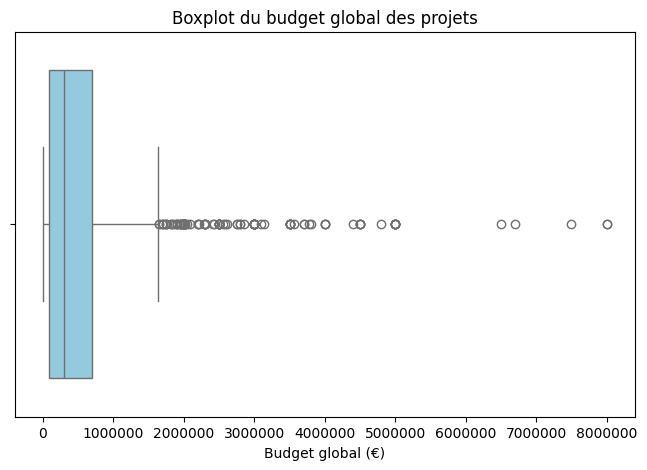

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.boxplot(x=df["budget_global_projet_gagnant"], color="skyblue")
plt.title("Boxplot du budget global des projets")
plt.xlabel("Budget global (€)")
plt.ticklabel_format(style='plain', axis='x')  # évite la notation scientifique
plt.show()

*   **On remarque d'aprés le boxplot que la majorité des budgets sont inférieurs à  1000000 avec des exceptions qui apparaissent comme des outliers**

*   **On va diviser les budgets en intervalles pour voir le nombre des projets pour chaque intervalle puisque la majorité est inférieure à 1000000 donc on va prend ça en considération dans la division**

/tmp/ipython-input-1465838321.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="budget_intervalle", data=df, palette="Blues")


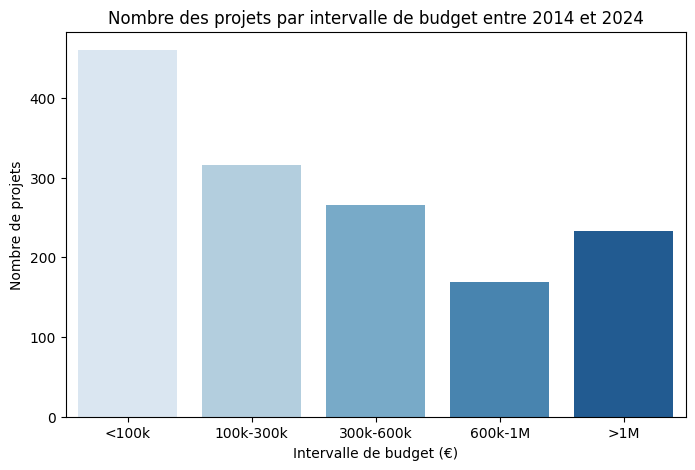

In [ ]:
# Définir des intervalles de budget (bins)
bins = [0, 100000, 300000, 600000, 1000000, df["budget_global_projet_gagnant"].max()]
labels = ["<100k", "100k-300k", "300k-600k", "600k-1M", ">1M"]

# Créer une nouvelle colonne avec les catégories
df["budget_intervalle"] = pd.cut(df["budget_global_projet_gagnant"], bins=bins, labels=labels, include_lowest=True)

# Histogramme basé sur les intervalles
plt.figure(figsize=(8,5))
sns.countplot(x="budget_intervalle", data=df, palette="Blues")
plt.title("Nombre des projets par intervalle de budget entre 2014 et 2024")
plt.xlabel("Intervalle de budget (€)")
plt.ylabel("Nombre de projets")
plt.show()

*   **On remarque que la majorité des projets sont inférieurs à 100k et peu de grands projets**

*   **On va dessiner la distribution des budgets pour essayer de détecter si ilya une forme commune comme la forme normale mais**

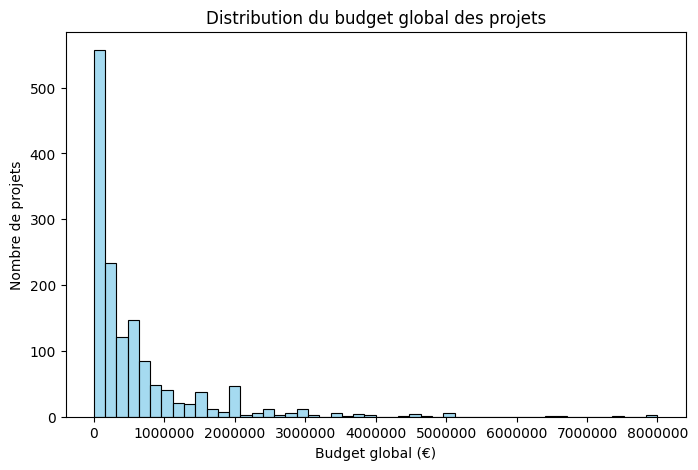

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df["budget_global_projet_gagnant"], bins=50, color="skyblue")
plt.title("Distribution du budget global des projets")
plt.xlabel("Budget global (€)")
plt.ylabel("Nombre de projets")
plt.ticklabel_format(style='plain', axis='x')  # évite la notation scientifique
plt.show()

*   **il parait que la distribution n'est pas normale,on va vérifier plus notre conclusion par un test Shapiro-Wilk**

In [ ]:
from scipy.stats import shapiro

# Test de normalité sur le budget
stat, p = shapiro(df["budget_global_projet_gagnant"])
print("Shapiro-Wilk Stat =", stat, "p-value =", p)

if p > 0.05:
    print("=> Distribution proche de la normale")
else:
    print("=> Distribution non normale")

Shapiro-Wilk Stat = 0.6358514758055849 p-value = 5.82950854806375e-48
=> Distribution non normale


*   **Notre conclusion était vraie la distribution n'est pas normale**

*   **Avant de procéder aux comparaisons statistiques, nous avons vérifié la normalité de la distribution des budgets des projets. Le test de Shapiro-Wilk a montré que la variable ne suit pas une loi normale (p < 0,05), ce qui est cohérent avec la forte asymétrie observée dans les histogrammes et boxplots. Dans ce contexte, l’utilisation de tests paramétriques tels que l’ANOVA ou le test t n’est pas appropriée, car ils reposent sur l’hypothèse de normalité et d’homogénéité des variances. Nous avons donc privilégié des tests non paramétriques (Kruskal-Wallis, Mann-Whitney, Spearman, Chi²), qui ne nécessitent pas cette hypothèse et sont plus robustes face aux distributions asymétriques et aux valeurs extrêmes. Ce choix garantit une analyse fiable et adaptée à la structure réelle des données.**

*   **Boxplot des budgets par thématique**

/tmp/ipython-input-2689482971.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="thematique", y="budget_global_projet_gagnant", data=df, palette="Set2")


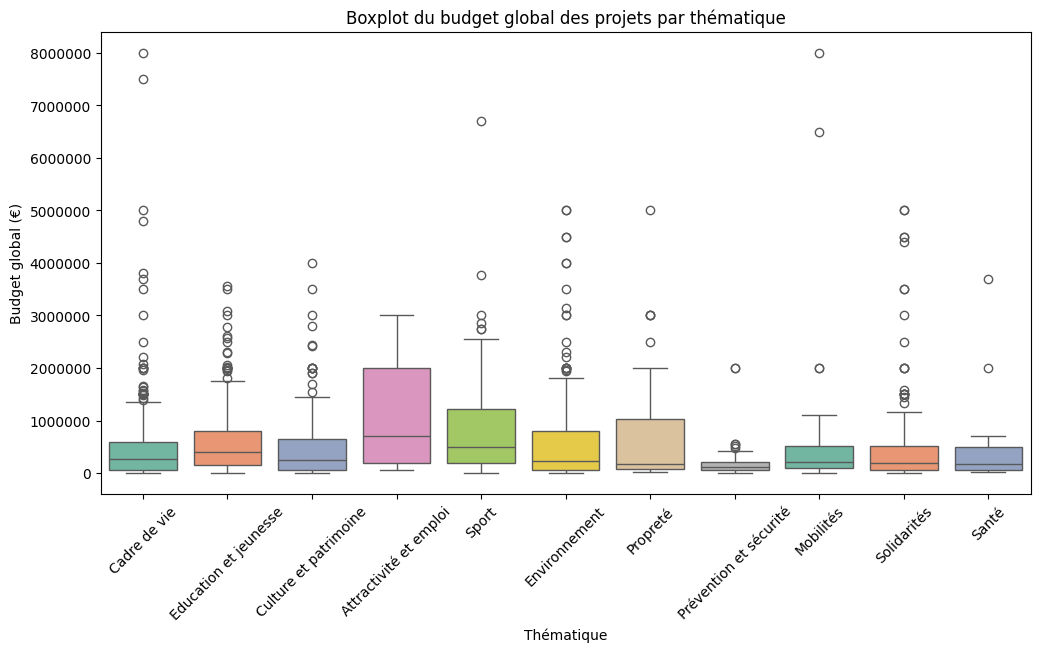

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(x="thematique", y="budget_global_projet_gagnant", data=df, palette="Set2")
plt.title("Boxplot du budget global des projets par thématique")
plt.xlabel("Thématique")
plt.ylabel("Budget global (€)")
plt.xticks(rotation=45)  # rotation pour lisibilité
plt.ticklabel_format(style='plain', axis='y')  # éviter la notation scientifique
plt.show()

*   **On remarque que le budget se varie par thématique**

*   **On va faire le test de kruskal pour voir si notre observation est vraie**

In [ ]:
from scipy.stats import kruskal

# Créer les groupes de budgets par thématique
groups = [df.loc[df["thematique"] == t, "budget_global_projet_gagnant"]
          for t in df["thematique"].unique()]

# Test de Kruskal-Wallis
h_stat, p_val = kruskal(*groups)
print("Kruskal-Wallis H =", h_stat, "p-value =", p_val)

if p_val < 0.05:
    print("=> Différences significatives de budget entre thématiques")
else:
    print("=> Pas de différences significatives entre thématiques")


Kruskal-Wallis H = 71.1884150017671 p-value = 2.6126696173309273e-11
=> Différences significatives de budget entre thématiques


*   **Oui certaines thématiques nécessitent plus de budgets que d'autres**

*   **box plot des budgets par direction de projet**

/tmp/ipython-input-2390961498.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="direction_pilote_projet",


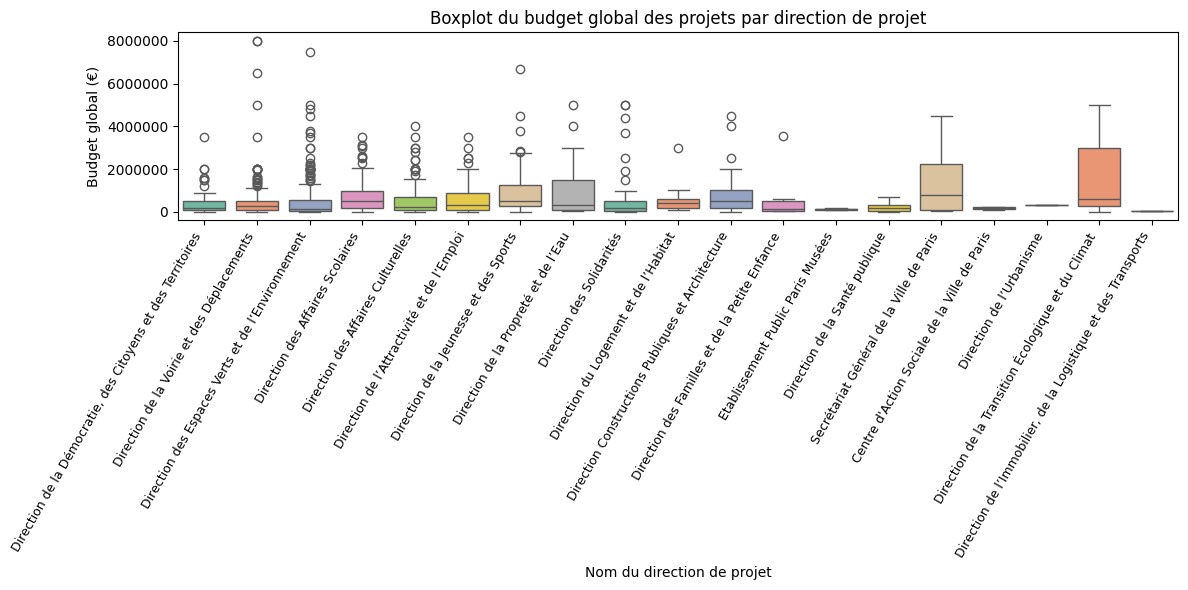

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(x="direction_pilote_projet",
            y="budget_global_projet_gagnant",
            data=df, palette="Set2")
plt.title("Boxplot du budget global des projets par direction de projet")
plt.xlabel("Nom du direction de projet")
plt.ylabel("Budget global (€)")
plt.xticks(rotation=60, ha="right", fontsize=9)  # rotation + alignement
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()  # ajuste automatiquement
plt.show()

*   **On remarque de meme que le budget se varie en fonction du direction**

*   **De meme on va faire le test de kruskal pour voir si notre interprétation est vraie**

In [ ]:
from scipy.stats import kruskal

# Créer les groupes de budgets par thématique
groups = [df.loc[df["direction_pilote_projet"] == t, "budget_global_projet_gagnant"]
          for t in df["direction_pilote_projet"].unique()]

# Test de Kruskal-Wallis
h_stat, p_val = kruskal(*groups)
print("Kruskal-Wallis H =", h_stat, "p-value =", p_val)

if p_val < 0.05:
    print("=> Différences significatives de budget entre direction de projets")
else:
    print("=> Pas de différences significatives entre direction de projets")


Kruskal-Wallis H = 115.02887565172561 p-value = 3.61562513114057e-16
=> Différences significatives de budget entre direction de projets


*   **Oui le budget change d'une direction à une autre**

/tmp/ipython-input-883922077.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="edition", y="budget_global_projet_gagnant", data=df, palette="Set2")


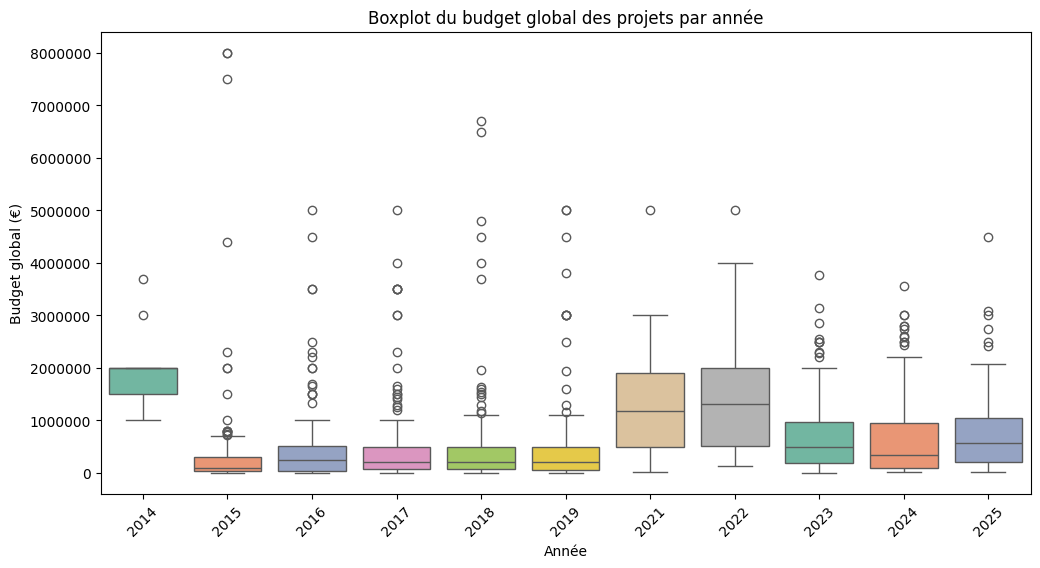

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(x="edition", y="budget_global_projet_gagnant", data=df, palette="Set2")
plt.title("Boxplot du budget global des projets par année")
plt.xlabel("Année")
plt.ylabel("Budget global (€)")
plt.xticks(rotation=45)  # rotation pour lisibilité
plt.ticklabel_format(style='plain', axis='y')  # éviter la notation scientifique
plt.show()

*   **De meme il parait que le budget investit se varie par an**

*   **De meme on va faire le test de kruskal pour voir si notre interprétation est vraie**

In [ ]:
from scipy.stats import kruskal

# Créer les groupes de budgets par thématique
groups = [df.loc[df["edition"] == t, "budget_global_projet_gagnant"]
          for t in df["edition"].unique()]

# Test de Kruskal-Wallis
h_stat, p_val = kruskal(*groups)
print("Kruskal-Wallis H =", h_stat, "p-value =", p_val)

if p_val < 0.05:
    print("=> Différences significatives de budget par année")
else:
    print("=> Pas de différences significatives de budget par année")

Kruskal-Wallis H = 259.5942125592775 p-value = 5.201973436025215e-50
=> Différences significatives de budget par année



*   **Notre conclusion est juste l'année affecte la variation du budget**

# 4.**Analyse de données exploratoire (EDA) & interpretations**

## 4.1. Démarche globale d'analyse:

On va faire l'analyse en se concentrant sur **3 axes principales**:
1.   **Analyse selon le nombre des projets finis**:on va se concentrer ici sur le nombre projets en cas d'avancements FIN
2.   **Analyse selon la somme des budgets réellement investis**: on ne va  pas se concentrer ici au somme globale des budgets réellement investis dans cette data car ilya des projets qui sont abondonnés,non commencés ou en étapes premières d'études donc leur budget n'est pas réellement investis c'est pourquoi on s'interesse seulement au somme des 3 cas d'avancements :LIVRABLE,TRAVAUX,FIN
3. **Analyse selon la durée moyenne en mois des projets finis**: on va se concentrer ici sur la moyenne en mois de la durée : du date de lancement de procédures du projet jusqu'au date de l'ouverture des projets deja finis

## 4.2. Analyse selon le nombre de projets finis :

*   On va se concentrer ici sur le nombre projets en cas d'avancements "FIN" en conçentrant sur 4 axes:


1.   **Par édition (Année)**
2.   **Par thématique**
3.   **Par direction de projet**
4.   **Par arrondissement**

### 4.2.1. Par année:

####  **Le nombre de projets par édition (année):**

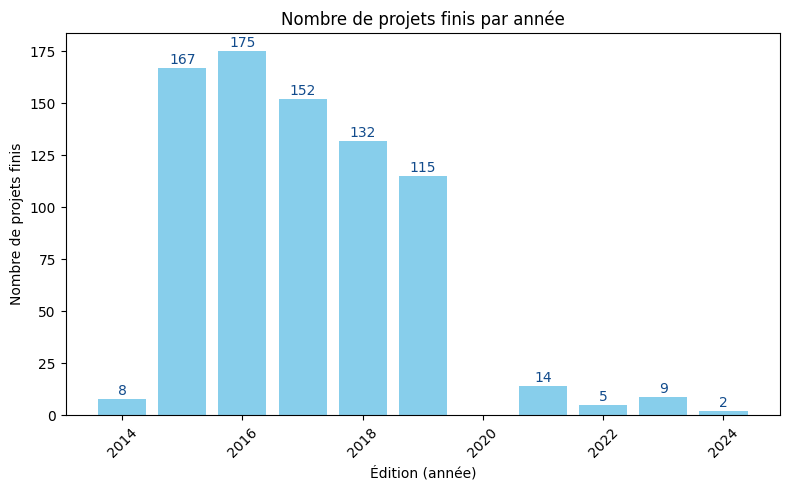

In [ ]:
# 1) Filtrer les projets finis
df_fin = df[df["avancement_projet"] == "FIN"]

# 2) Compter par édition/année
projets_par_annee = df_fin.groupby("edition").size().reset_index(name="nb_projets_fin")

# 3) Visualiser en bar chart
plt.figure(figsize=(8,5))
bars = plt.bar(projets_par_annee["edition"], projets_par_annee["nb_projets_fin"], color="skyblue")

plt.title("Nombre de projets finis par année")
plt.xlabel("Édition (année)")
plt.ylabel("Nombre de projets finis")
plt.xticks(rotation=45)

# Ajouter les annotations au-dessus de chaque barre
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,  # position horizontale centrée
        height + 0.5,                     # juste au-dessus de la barre
        str(int(height)),                 # valeur entière
        ha='center', va='bottom', fontsize=10, color='#114B8C'
    )

plt.tight_layout()
plt.show()

*   **Interpretation et analyse**: On remarque qu'avant 2020 le nbre de projets finis était important ,mais en 2020 ,on a 0 projet fini est la cause trés probable est la pandemie COVID-19 qui a probablement a stopé l'avancements de certaines projets et probablement l'annulation d'autres et on remarque que l'effet de pandémie a eu un impact aussi au cours des années qui suivent 2020 puisque on remarque que peu de projets sont finis de 2020 jusqu'au 2024

####   **Le pourcentage des projets finis par édition (année):**

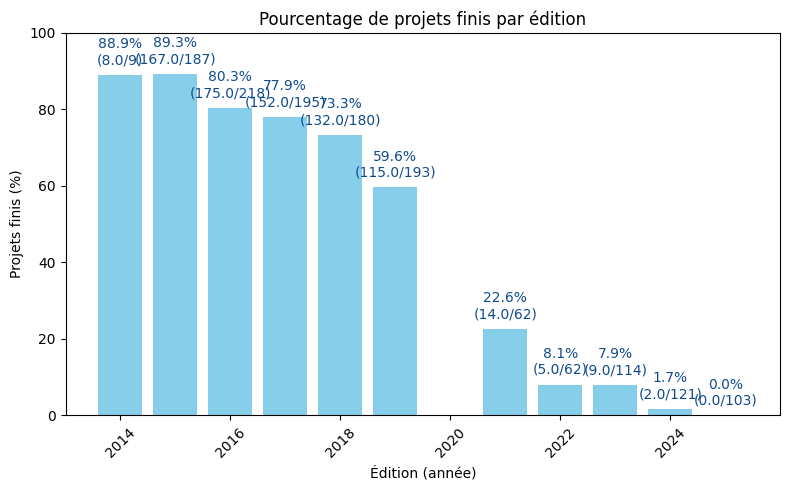

In [ ]:
# 1) Compter le nombre total de projets par édition
total_par_annee = df.groupby("edition").size().reset_index(name="nb_total")

# 2) Compter le nombre de projets finis par édition
fin_par_annee = df[df["avancement_projet"] == "FIN"].groupby("edition").size().reset_index(name="nb_fin")

# 3) Fusionner
projets_par_annee = total_par_annee.merge(fin_par_annee, on="edition", how="left")
projets_par_annee["nb_fin"] = projets_par_annee["nb_fin"].fillna(0)

# 4) Calculer le pourcentage
projets_par_annee["pct_fin"] = (projets_par_annee["nb_fin"] / projets_par_annee["nb_total"]) * 100

# 5) Visualiser en bar chart
plt.figure(figsize=(8,5))
bars = plt.bar(projets_par_annee["edition"], projets_par_annee["pct_fin"], color="skyblue")

plt.title("Pourcentage de projets finis par édition")
plt.xlabel("Édition (année)")
plt.ylabel("Projets finis (%)")
plt.xticks(rotation=45)
plt.ylim(0, 100)

# Ajouter les annotations (pourcentage + ratio, l’un sous l’autre)
for i, bar in enumerate(bars):
    height = bar.get_height()
    nb_fin = projets_par_annee.loc[i, "nb_fin"]
    nb_total = projets_par_annee.loc[i, "nb_total"]

    # Texte combiné sur deux lignes
    annotation = f"{height:.1f}%\n({nb_fin}/{nb_total})"

    plt.text(
        bar.get_x() + bar.get_width()/2,
        height + 2,   # position juste au-dessus de la barre
        annotation,
        ha='center', va='bottom', fontsize=10, color='#114B8C'
    )

plt.tight_layout()
plt.show()

**Interpretation et analyse**: De meme on remarque l'impact de la pandémie sur le taux de finition de projets depuis 2020 et probablement que la pandémie ainsi que la guerre russie/ocranie a causé des problémes financiéres ,ce qui impacté la réalisation des projets

### 4.2.2. Par thématique:

#### **Le nombre de projets finis par thématique de 2014 jusqu'au 2024:**

/tmp/ipython-input-1535653343.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


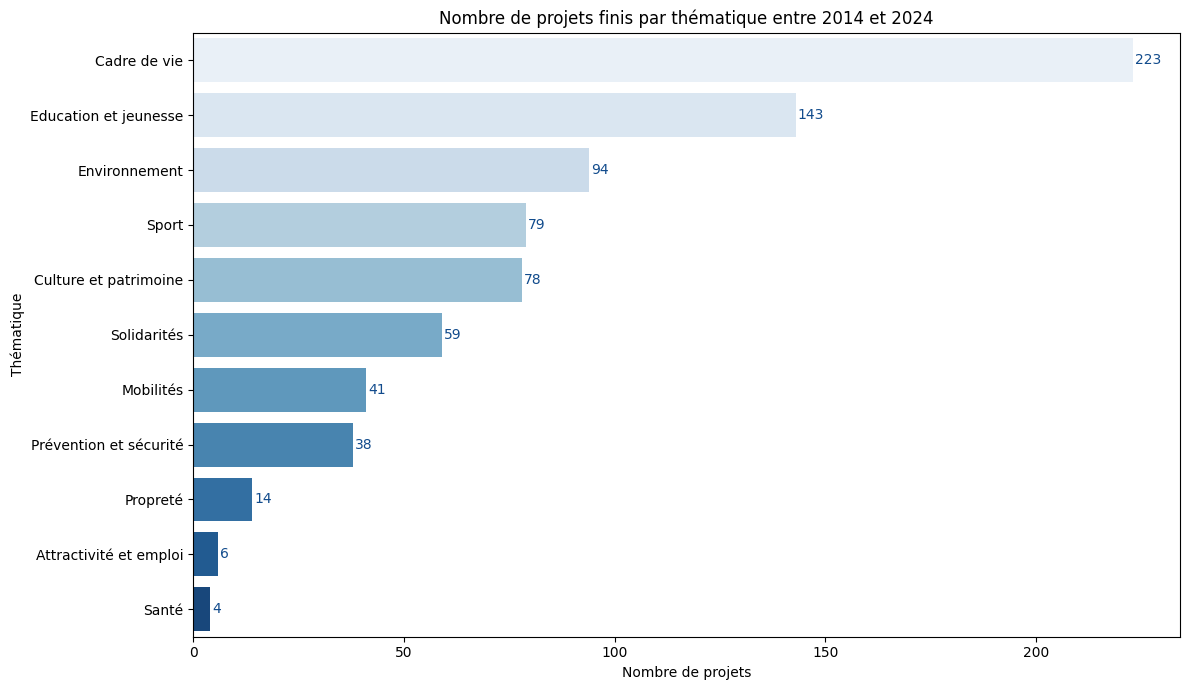

In [ ]:
# Filtrer les projets finis
df_fin = df[df['avancement_projet'] == 'FIN']

plt.figure(figsize=(12, 7))
ax = sns.countplot(
    y='thematique',
    data=df_fin,
    order=df_fin['thematique'].value_counts().index,
    palette='Blues'
)

plt.title('Nombre de projets finis par thématique entre 2014 et 2024')
plt.xlabel('Nombre de projets')
plt.ylabel('Thématique')
plt.tight_layout()

# Annoter chaque barre avec le nombre
for p in ax.patches:
    width = p.get_width()
    y = p.get_y() + p.get_height() / 2
    ax.text(width + 0.5, y, int(width), va='center', ha='left', fontsize=10, color='#114B8C')

plt.show()

*   **Interprétation et analyse**: On remarque que la thématique cadre de vie a le nombre de projets le plus réalisés est c'est tout a fait logique car cette thématique présente les projets qui améliorent la qualité de vie quotidienne, comme l’aménagement d’espaces publics, la création de lieux conviviaux ou la rénovation urbaine. ces projets sont des mini-projets avec des démarches et budgets plus faciles et flexibles au contraire au domaine du santé qui porte souvent des grands projets avec des budgets énorme mais la santé publique est un droit trés important donc les responsables doivent accélérer le déroulement des projets dans ce secteur surtout aprés la pandémie qui a montré que le systéme santaire français soufre beaucoup

#### **Pourcentage des projets finis par thématiques de 2014-2024:**

**Remarque:** le tri au niveau de visuelle ne se fait pas seulement par pourcentage mais par pourcentage pondéré par le nombre de projets, pour bien avoir un classement plus juste

/tmp/ipython-input-148461097.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


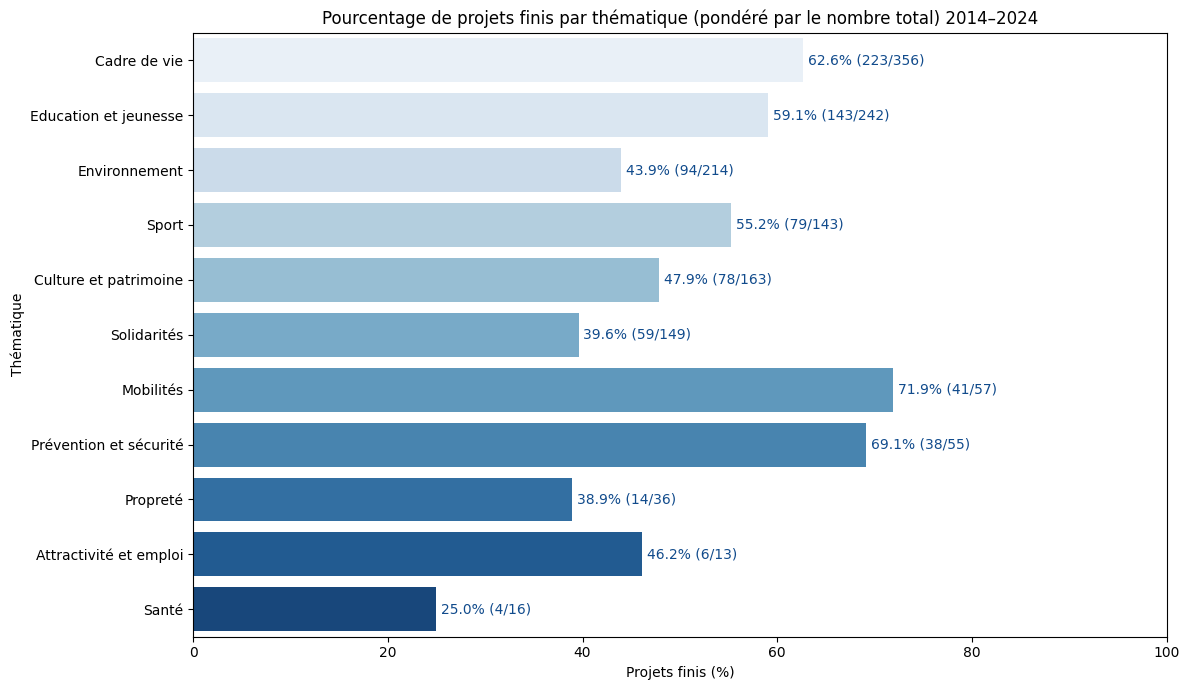

In [ ]:
# Comptage total par thématique
total_counts = df['thematique'].value_counts()

# Comptage des projets finis par thématique
fin_counts = df[df['avancement_projet'] == 'FIN']['thematique'].value_counts()

# Construire DataFrame avec pourcentages
stats = pd.DataFrame({
    'total': total_counts,
    'fin': fin_counts
}).fillna(0)

stats['pct_fin'] = (stats['fin'] / stats['total']) * 100

# Créer une métrique combinée (score = % × total)
stats['score'] = stats['pct_fin'] * stats['total']

# Trier par score décroissant
stats = stats.sort_values('score', ascending=False)

# Tracer le barplot horizontal avec ordre trié
plt.figure(figsize=(12,7))
ax = sns.barplot(
    y=stats.index,
    x=stats['pct_fin'],
    palette='Blues',
    order=stats.index  # ordre basé sur le tri pondéré
)

plt.title("Pourcentage de projets finis par thématique (pondéré par le nombre total) 2014–2024")
plt.xlabel("Projets finis (%)")
plt.ylabel("Thématique")

# Annoter chaque barre avec le pourcentage et les nombres
for i, (pct, fin, tot) in enumerate(zip(stats['pct_fin'], stats['fin'], stats['total'])):
    ax.text(
        pct + 0.5, i, f"{pct:.1f}% ({int(fin)}/{int(tot)})",
        va='center', ha='left', fontsize=10, color='#114B8C'
    )

plt.xlim(0, 100)
plt.tight_layout()
plt.show()

*   **Interpretation et analyse:** on remarque selon notre tri pondéré la thématique cadre de vie est la premiére malgré que sa pourcentage de la finition des projets entre 2014-2024 est de 65% mais vu le nombre enormes des projets réalisés elle est au top des thématiques .Le domaine de santé est le dernier avec seulement 4/15 projets finis,ce qui se pose un probléme au niveau des projets de santé et les stratégies adaptés au niveau de ce domaine


### 4.2.3. Par direction de projet

#### **Nombre de projets finis par direction de projet:**

/tmp/ipython-input-4116878080.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


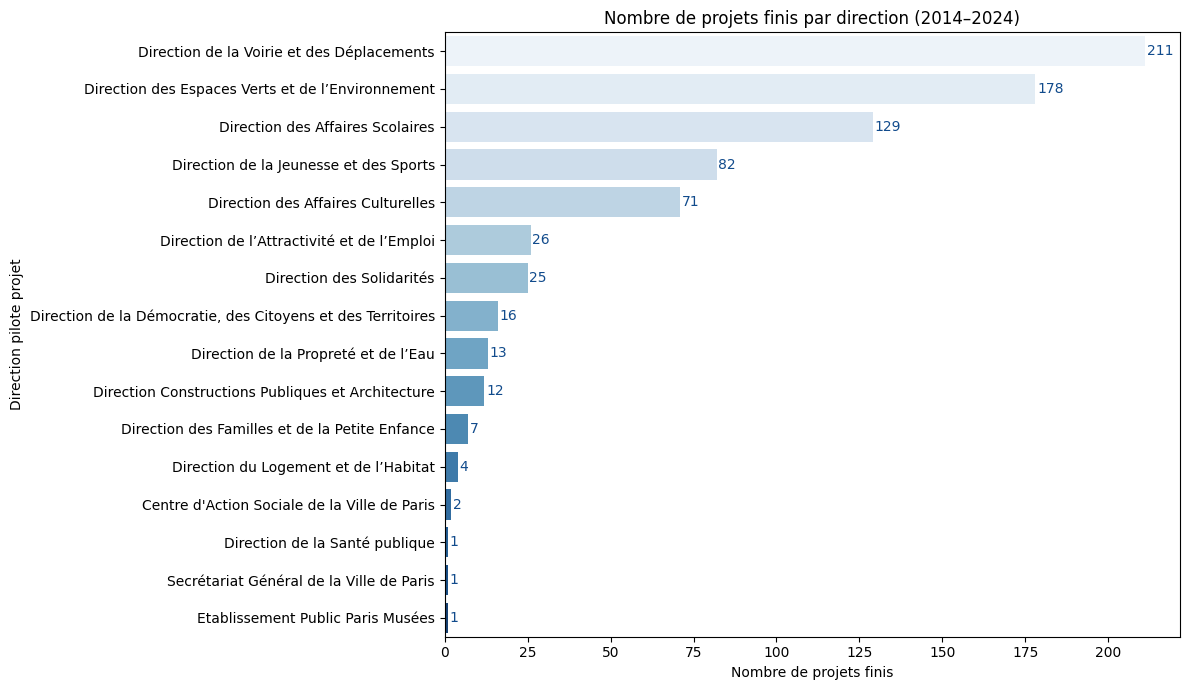

In [ ]:
# Filtrer uniquement les projets finis
df_fin = df[df["avancement_projet"] == "FIN"]

# Comptage par direction
counts = df_fin["direction_pilote_projet"].value_counts()

# Transformer en DataFrame pour plus de clarté
stats = counts.reset_index()
stats.columns = ["direction_pilote_projet", "nb_projets_fin"]


# Tracer le barplot horizontal
plt.figure(figsize=(12,7))
ax = sns.barplot(
    y=stats["direction_pilote_projet"],
    x=stats["nb_projets_fin"],
    palette="Blues"
)

plt.title("Nombre de projets finis par direction (2014–2024)")
plt.xlabel("Nombre de projets finis")
plt.ylabel("Direction pilote projet")

# Annoter chaque barre avec le nombre
for i, val in enumerate(stats["nb_projets_fin"]):
    ax.text(val + 0.5, i, str(val), va="center", ha="left", fontsize=10, color="#114B8C")

plt.tight_layout()
plt.show()

*   **Interpretation et analyse :** On remarque que entre 2014-2024 la direction de la voirie et des déplacements qui est responsable des projets liés aux routes, trottoirs, circulation et mobilités a le nombre le plus elevé des projets et c'est tout a fait logique car les projets aux niveau de ces secteurs la ont la priorité et aussi ce sont dans la majorité des minis projets avec des démarches rapides et faciles et des budgets minimales,on trouve en bas la direction de la santé publique qui a terminé seulement un projet ce qui impose une autre fois des questions sur la stratégie de déroulement de ces projets.

#### **Pourcentage de projets finis par direction:**

**Remarque:** le tri au niveau de visuelle ne se fait pas seulement par pourcentage mais par pourcentage pondéré par le nombre de projets, pour bien avoir un classement plus juste

/tmp/ipython-input-1668518995.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


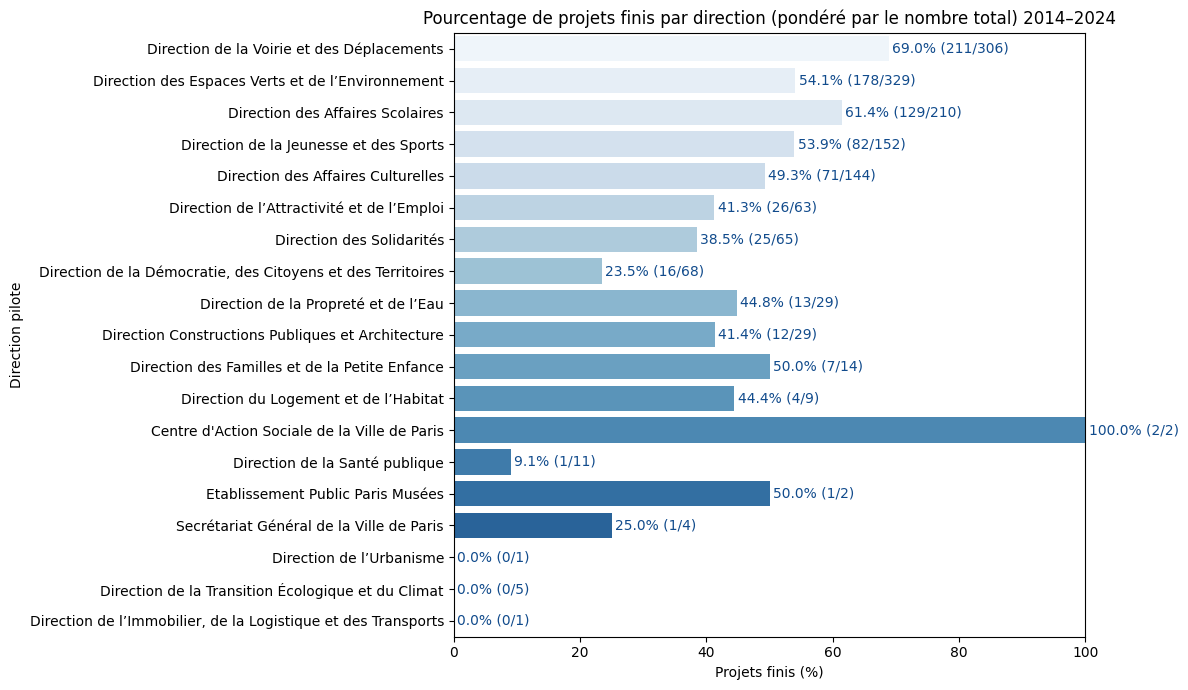

In [ ]:

# 1) Comptage total par direction pilote
total_counts = df['direction_pilote_projet'].value_counts()

# 2) Comptage des projets finis par direction pilote
fin_counts = df[df['avancement_projet'] == 'FIN']['direction_pilote_projet'].value_counts()

# 3) Construire DataFrame avec pourcentages
stats = pd.DataFrame({
    'total': total_counts,
    'fin': fin_counts
}).fillna(0)

stats['pct_fin'] = (stats['fin'] / stats['total']) * 100

# 4) Créer une métrique combinée (score = % × total)
stats['score'] = stats['pct_fin'] * stats['total']

# 5) Trier par score décroissant
stats = stats.sort_values('score', ascending=False)

# 6) Tracer le barplot horizontal avec ordre trié
plt.figure(figsize=(12,7))
ax = sns.barplot(
    y=stats.index,
    x=stats['pct_fin'],
    palette='Blues',
    order=stats.index  # ordre basé sur le tri pondéré
)

plt.title("Pourcentage de projets finis par direction (pondéré par le nombre total) 2014–2024")
plt.xlabel("Projets finis (%)")
plt.ylabel("Direction pilote")

# 7) Annoter chaque barre avec le pourcentage et les nombres
for i, (pct, fin, tot) in enumerate(zip(stats['pct_fin'], stats['fin'], stats['total'])):
    ax.text(
        pct + 0.5, i, f"{pct:.1f}% ({int(fin)}/{int(tot)})",
        va='center', ha='left', fontsize=10, color='#114B8C'
    )

plt.xlim(0, 100)
plt.tight_layout()
plt.show()

*   **Interprétation et analyse:** Par pourcentage pondéré,on remarque que la direction de la voirie et des déplacements a le plus succés aux niveaux des projets finis par rapport aux projets totales,en bas on trouve que certaines directions n'ont pas finis un seul projet en 10 ans avec un succés de 0%,il est important de savoir la cause de cete echec et de revisiter les stratégie adoptées pour ces secteurs

### 4.2.4. Par arrondissement:



*   **Chargement du map:**

In [ ]:
# 1) Charger le GeoJSON
import geopandas as gpd
url = "https://opendata.paris.fr/explore/dataset/arrondissements/download/?format=geojson&timezone=Europe/Paris&use_labels_for_header=true"
paris = gpd.read_file(url)

#### **Nombres de projets finis par arrondissement:**

   c_ar l_aroff  nb_projets_fin
3     1  Louvre               5


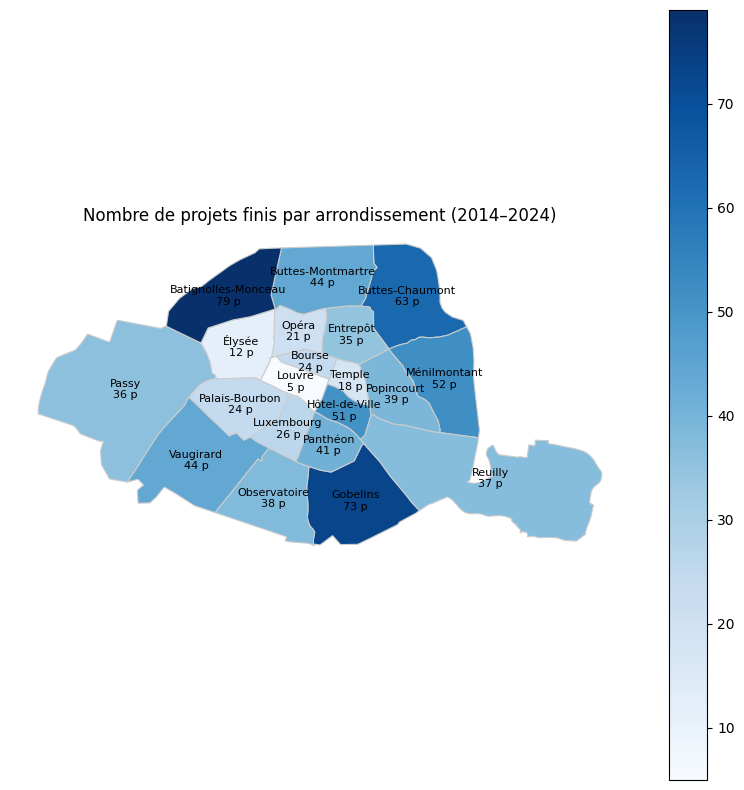

In [ ]:
# 2) Transformer directement 'arrondissement_projet_gagnant' en numéro d'arrondissement (int)
# Exemple : 75001 -> 1, 75012 -> 12
df["arrondissement_projet_gagnant"] = df["arrondissement_projet_gagnant"].astype(str).str[-2:].astype(int)

# 3) Compter le nombre de projets finis par arrondissement
projets_par_arr = (
    df[df["avancement_projet"] == "FIN"]["arrondissement_projet_gagnant"]
    .value_counts()
    .reset_index()
)
projets_par_arr.columns = ["arrondissement_projet_gagnant", "nb_projets_fin"]

# 4) Harmoniser les types pour la fusion (tout en int)
paris["c_ar"] = paris["c_ar"].astype(int)
projets_par_arr["arrondissement_projet_gagnant"] = projets_par_arr["arrondissement_projet_gagnant"].astype(int)

# 5) Fusionner
paris = paris.merge(projets_par_arr, left_on="c_ar", right_on="arrondissement_projet_gagnant", how="left")
paris["nb_projets_fin"] = paris["nb_projets_fin"].fillna(0)

# Vérification Louvre
print(paris[paris["l_aroff"] == "Louvre"][["c_ar", "l_aroff", "nb_projets_fin"]])

# 6) Tracer la carte choroplèthe
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
paris.plot(
    column="nb_projets_fin",
    cmap="Blues",
    linewidth=0.8,
    ax=ax,
    edgecolor="0.8",
    legend=True
)

plt.title("Nombre de projets finis par arrondissement (2014–2024)")
plt.axis("off")

# 7) Ajouter les noms et le nombre de projets au centre
for idx, row in paris.iterrows():
    centroid = row.geometry.centroid
    plt.text(
        centroid.x, centroid.y,
        f"{row['l_aroff']}\n{int(row['nb_projets_fin'])} p",  # affichage abrégé
        ha="center", va="center",
        fontsize=8, color="black"
    )

plt.show()

*   **Interpretation et analyse:** on remarque que Batignoles-Monceau est au top des arrondissements avec 79p finis ,en deuxiéme position on trouve Gobelins et en troisiéme Buttes-Chaumont, en dernier places en trouve Elysée avec seulement 12 projets finis et Louvre avec seulement 5 projets finis en 10 ans ,cet map montre qu'ilya une inégalité entre les arrondissements et c'est important de changer les stratégies pour bien faire le balance au niveau de réalisations des projets entre toutes les arrondissements

#### **Pourcentage des projets finis par arrondissement:**

   c_ar l_aroff  nb_total  nb_fin  pct_fin
3     1  Louvre        10       5     50.0


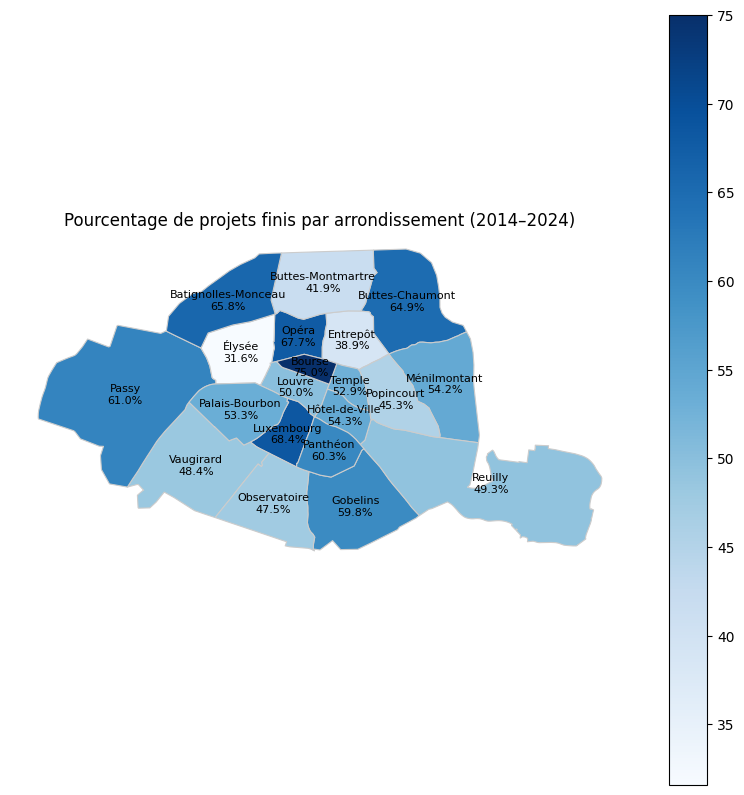

In [ ]:
# 2) Transformer directement 'arrondissement_projet_gagnant' en numéro d'arrondissement (int)
df["arrondissement_projet_gagnant"] = df["arrondissement_projet_gagnant"].astype(str).str[-2:].astype(int)

# 3) Compter le nombre total de projets par arrondissement
total_par_arr = (
    df.groupby("arrondissement_projet_gagnant")["avancement_projet"]
    .count()
    .reset_index()
)
total_par_arr.columns = ["arrondissement_projet_gagnant", "nb_total"]

# 4) Compter le nombre de projets finis par arrondissement
fin_par_arr = (
    df[df["avancement_projet"] == "FIN"]["arrondissement_projet_gagnant"]
    .value_counts()
    .reset_index()
)
fin_par_arr.columns = ["arrondissement_projet_gagnant", "nb_fin"]

# 5) Fusionner total et finis
projets_par_arr = total_par_arr.merge(fin_par_arr, on="arrondissement_projet_gagnant", how="left")
projets_par_arr["nb_fin"] = projets_par_arr["nb_fin"].fillna(0)

# 6) Calculer le pourcentage
projets_par_arr["pct_fin"] = (projets_par_arr["nb_fin"] / projets_par_arr["nb_total"]) * 100

# 7) Harmoniser les types pour la fusion avec GeoJSON
paris["c_ar"] = paris["c_ar"].astype(int)
projets_par_arr["arrondissement_projet_gagnant"] = projets_par_arr["arrondissement_projet_gagnant"].astype(int)

# 8) Fusionner avec GeoDataFrame
paris = paris.merge(projets_par_arr, left_on="c_ar", right_on="arrondissement_projet_gagnant", how="left")
paris["pct_fin"] = paris["pct_fin"].fillna(0)

# Vérification Louvre
print(paris[paris["l_aroff"] == "Louvre"][["c_ar", "l_aroff", "nb_total", "nb_fin", "pct_fin"]])

# 9) Tracer la carte choroplèthe
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
paris.plot(
    column="pct_fin",
    cmap="Blues",
    linewidth=0.8,
    ax=ax,
    edgecolor="0.8",
    legend=True
)

plt.title("Pourcentage de projets finis par arrondissement (2014–2024)")
plt.axis("off")

# 10) Ajouter les noms et le pourcentage au centre
for idx, row in paris.iterrows():
    centroid = row.geometry.centroid
    plt.text(
        centroid.x, centroid.y,
        f"{row['l_aroff']}\n{row['pct_fin']:.1f}%",
        ha="center", va="center",
        fontsize=8, color="black"
    )

plt.show()

*   **Interpretation et analyse:** On remarque que Bourse a la pourcentage des projets finis la plus elevée plus 77% mais une autre fois on trouve que Elysée et Louvre sont en bas du classement avec un taux de succés trés bas ce qui pose des questions sur les stratégies adoptées aux niveau de ces deux arrondissements

## 4.3.Analyse selon la somme des budgets réellement investis

On ne va  pas se concentrer ici aux somme globale des budgets registrés car ilya des projets qui sont abondonnés,non commencés ou en étapes premières d'études donc leur budget n'est pas réellement investis c'est pourquoi on s'interesse seulement au somme des 3 cas d'avancements :LIVRABLE,TRAVAUX,FIN sur 4 axes:
1. **Par édition (Année)**
2. **Par thématique**
3. **Par direction de projet**
4. **Par arrondissement**

### 4.3.1. Par édition (Année):

#### **Par édition (année):**

/tmp/ipython-input-4091457227.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


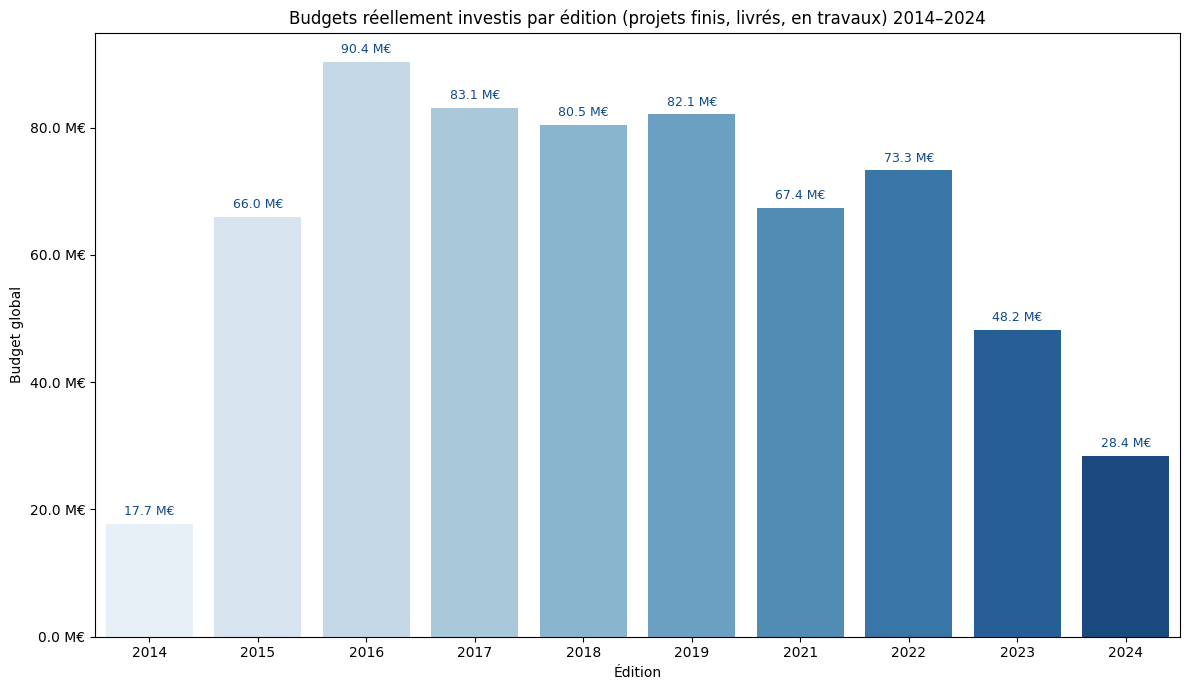

In [ ]:
import matplotlib.ticker as mticker

# Filtrer les projets réellement investis
df_investi = df[df['avancement_projet'].isin(['FIN', 'LIVRAISON', 'TRAVAUX'])].copy()

# S'assurer que 'edition' est numérique pour un tri correct
df_investi['edition'] = pd.to_numeric(df_investi['edition'], errors='coerce')

# Calculer la somme des budgets par édition et trier
sum_budget_by_edition = (
    df_investi.groupby('edition')['budget_global_projet_gagnant']
    .sum()
    .dropna()
    .sort_index()
)

plt.figure(figsize=(12, 7))
ax = sns.barplot(
    x=sum_budget_by_edition.index.astype(int),
    y=sum_budget_by_edition.values,
    palette='Blues'
)

plt.title("Budgets réellement investis par édition (projets finis, livrés, en travaux) 2014–2024")
plt.xlabel('Édition')
plt.ylabel('Budget global')

# Formater l’axe Y en millions d’euros
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f"{x/1e6:.1f} M€"))

# Ajouter des annotations au-dessus des barres
max_val = sum_budget_by_edition.values.max() if len(sum_budget_by_edition) else 0
for p in ax.patches:
    height = p.get_height()
    label_val = f"{height/1e6:.1f} M€" if height >= 1_000_000 else f"{height/1e3:.0f} k€"
    ax.text(
        p.get_x() + p.get_width()/2,
        height + (0.01 * max_val),
        label_val,
        ha='center', va='bottom', fontsize=9, color='#114B8C'
    )

plt.tight_layout()
plt.show()

*   **Interpretation et analyse:** On remarque que de l'investissement des budgets participatifs entre 2015 et 2019 était trés elevé mais aprés la pandémie el la guerre russie/ocranie l'investissement a significament diminué et probablement c'est à cause des problémes financiéres

### 4.3.2.Par thématique:

/tmp/ipython-input-3565379006.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


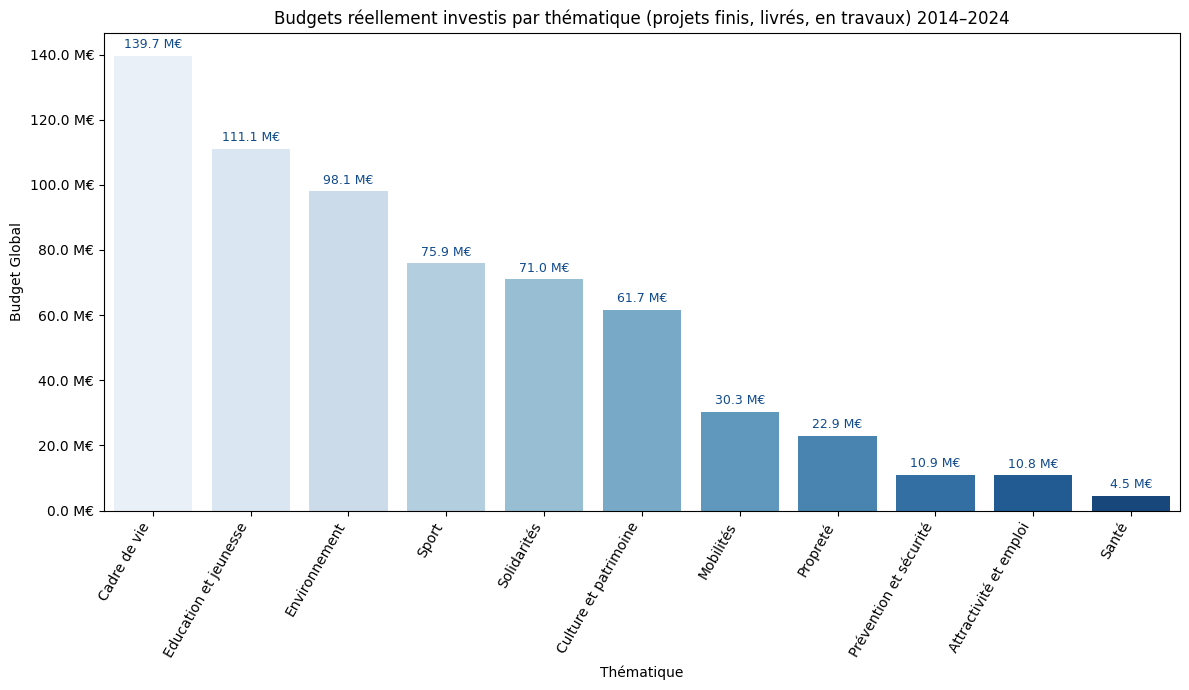

In [ ]:

# Filtrer les projets où le budget est investi
df_investi = df[df['avancement_projet'].isin(['FIN', 'LIVRAISON', 'TRAVAUX'])]

# Calculer la somme des budgets par thématique
sum_budget_by_thematique = (
    df_investi.groupby('thematique')['budget_global_projet_gagnant']
    .sum()
    .sort_values(ascending=False)
)

plt.figure(figsize=(12, 7))
ax = sns.barplot(
    x=sum_budget_by_thematique.index,
    y=sum_budget_by_thematique.values,
    palette='Blues'
)

# Titre clair et informatif
plt.title("Budgets réellement investis par thématique (projets finis, livrés, en travaux) 2014–2024")

plt.xlabel('Thématique')
plt.ylabel('Budget Global')
plt.xticks(rotation=60, ha='right')

# Formater l’axe Y en millions d’euros
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f"{x/1e6:.1f} M€"))

# Ajouter les annotations au-dessus de chaque barre
for p in ax.patches:
    height = p.get_height()
    label_val = f"{height/1e6:.1f} M€" if height >= 1_000_000 else f"{height/1e3:.0f} k€"
    ax.text(
        p.get_x() + p.get_width()/2, height + (0.01 * max(sum_budget_by_thematique.values)),
        label_val,
        ha='center', va='bottom', fontsize=9, color='#114B8C'
    )

plt.tight_layout()
plt.show()

*   **Interpretation et analyse:** Ce sont les memes interpretations que celles dans la partie du nombre des projets par thématique,l'investissement pour la thématique Cadre de vie est elevée tandis que l'investissement pour le secteur de santé est le minimale dans ces 10 ans .il faut revisiter la stratégie d'investissement des budgets participatifs sur ce secteur vitale

### 4.3.3.Par direction:

#### **Budget réellement investis par direction**

/tmp/ipython-input-1976094993.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


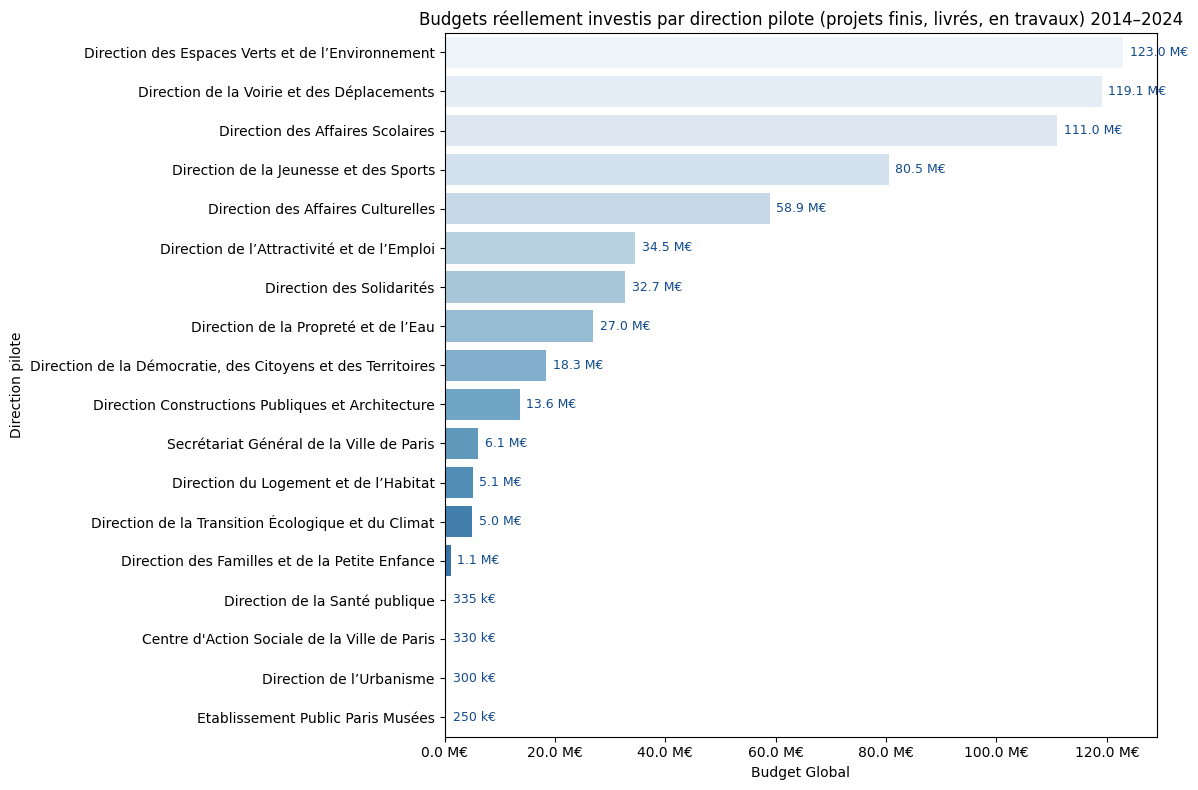

In [ ]:


# Filtrer les projets où le budget est investi
df_investi = df[df['avancement_projet'].isin(['FIN', 'LIVRAISON', 'TRAVAUX'])]

# Calculer la somme des budgets par direction pilote
sum_budget_by_direction = (
    df_investi.groupby('direction_pilote_projet')['budget_global_projet_gagnant']
    .sum()
    .sort_values(ascending=False)
)

plt.figure(figsize=(12, 8))
ax = sns.barplot(
    y=sum_budget_by_direction.index,
    x=sum_budget_by_direction.values,
    palette='Blues',
    orient='h'
)

# Titre clair et informatif
plt.title("Budgets réellement investis par direction pilote (projets finis, livrés, en travaux) 2014–2024")

plt.xlabel('Budget Global')
plt.ylabel('Direction pilote')

# Formater l’axe X en millions d’euros
ax.xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f"{x/1e6:.1f} M€"))

# Ajouter les annotations au bout de chaque barre
max_val = sum_budget_by_direction.values.max()
for p in ax.patches:
    width = p.get_width()
    label_val = f"{width/1e6:.1f} M€" if width >= 1_000_000 else f"{width/1e3:.0f} k€"
    ax.text(
        width + (0.01 * max_val),
        p.get_y() + p.get_height()/2,
        label_val,
        ha='left', va='center', fontsize=9, color='#114B8C'
    )

plt.tight_layout()
plt.show()

*   **Interpretation et analyse:** On remarque un petit changement par rapport au meme plot par nombre de projets que meme si la direction de la voirie et déplacements est au top des nombres de projets ,la direction des espaces vertes et environnement le surpasse dans cette section du budget,et ça peut etre expliquée que les projets de la direction des espaces verts et environnements sont moins nombreux mais plus couteux

### 4.3.4.Par arrondissment:

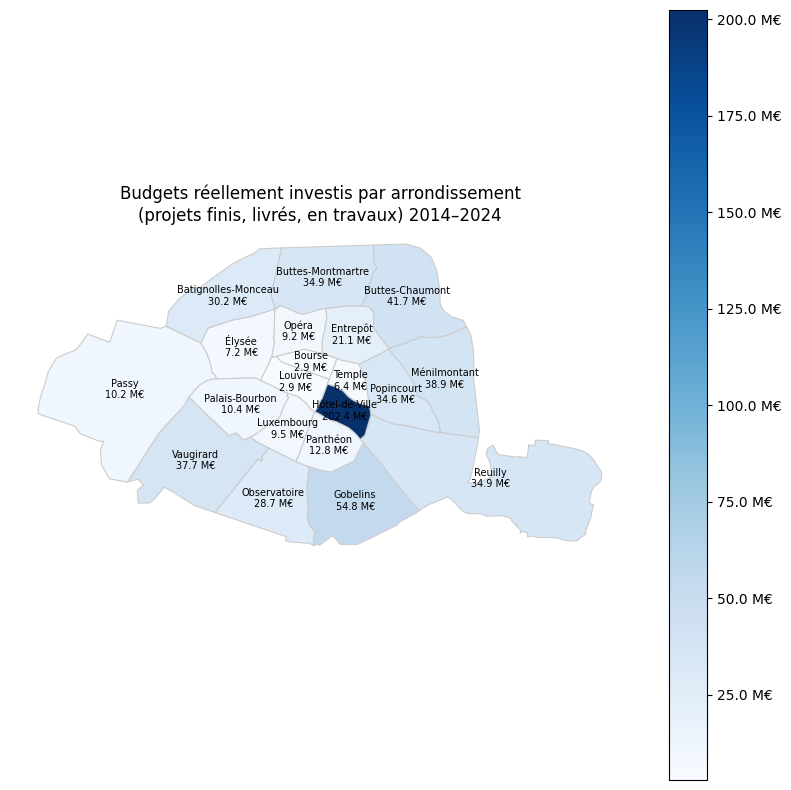

In [ ]:
# 2) Transformer directement 'arrondissement_projet_gagnant' en numéro d'arrondissement (int)
df["arrondissement_projet_gagnant"] = df["arrondissement_projet_gagnant"].astype(str).str[-2:].astype(int)

# 3) Agréger le budget des projets réellement investis (FIN, LIVRAISON, TRAVAUX)
projets_par_arr = (
    df[df["avancement_projet"].isin(["FIN", "LIVRAISON", "TRAVAUX"])]
    .groupby("arrondissement_projet_gagnant")["budget_global_projet_gagnant"]
    .sum()
    .reset_index()
)

# 4) Harmoniser les types pour la fusion
paris["c_ar"] = paris["c_ar"].astype(int)
projets_par_arr["arrondissement_projet_gagnant"] = projets_par_arr["arrondissement_projet_gagnant"].astype(int)

# 5) Fusionner et remplir les NaN
paris = paris.merge(projets_par_arr, left_on="c_ar", right_on="arrondissement_projet_gagnant", how="left")
paris["budget_global_projet_gagnant"] = paris["budget_global_projet_gagnant"].fillna(0)

# 6) Tracer la carte choroplèthe
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
paris.plot(
    column="budget_global_projet_gagnant",
    cmap="Blues",
    linewidth=0.8,
    ax=ax,
    edgecolor="0.8",
    legend=True
)

# Légende en M€ ou k€
def custom_formatter(x, pos):
    return f"{x/1e6:.1f} M€" if x >= 1_000_000 else f"{x/1e3:.0f} k€"

cbar = ax.get_figure().axes[-1]
cbar.yaxis.set_major_formatter(mticker.FuncFormatter(custom_formatter))

plt.title("Budgets réellement investis par arrondissement\n(projets finis, livrés, en travaux) 2014–2024")
plt.axis("off")

# 7) Ajouter les noms et montants au centre
for _, row in paris.iterrows():
    centroid = row.geometry.centroid
    val = row["budget_global_projet_gagnant"]
    label_val = f"{val/1e6:.1f} M€" if val >= 1_000_000 else f"{val/1e3:.0f} k€"
    plt.text(
        centroid.x, centroid.y,
        f"{row['l_aroff']}\n{label_val}",
        ha="center", va="center",
        fontsize=7, color="black"
    )

plt.show()

*   **Interpretation et analyse:** Malgré que l'arrondissement Hotel-de-ville n'est pas parmis des tops 3 dans la section du nombre de projets réalisés mais cette arrondissement en budget investis est largement supérieure à toute les autres arrondissements ,l'explication de ça est probablement qu'ilya des megas projets participatifs investis dans ces arrondissements avec des budgets énormes ce qui a impacté la somme des budgets.

## 4.4. Analyse selon la durée moyenne en mois des projets finis

*   On va se concentrer ici sur la moyenne en mois de la durée : du date de lancement des procédures du projet jusqu'au date de l'ouverture des projets deja finis, de meme en conçentrant sur 3 axes:

1. **Par édition (année)**
2. **Par thématique**
3. **Par direction**
4. **Par arrondissement**


### 4.4.1.Par édition (année):

#### **Durée moyenne des projets finis par année**

/tmp/ipython-input-3599317013.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


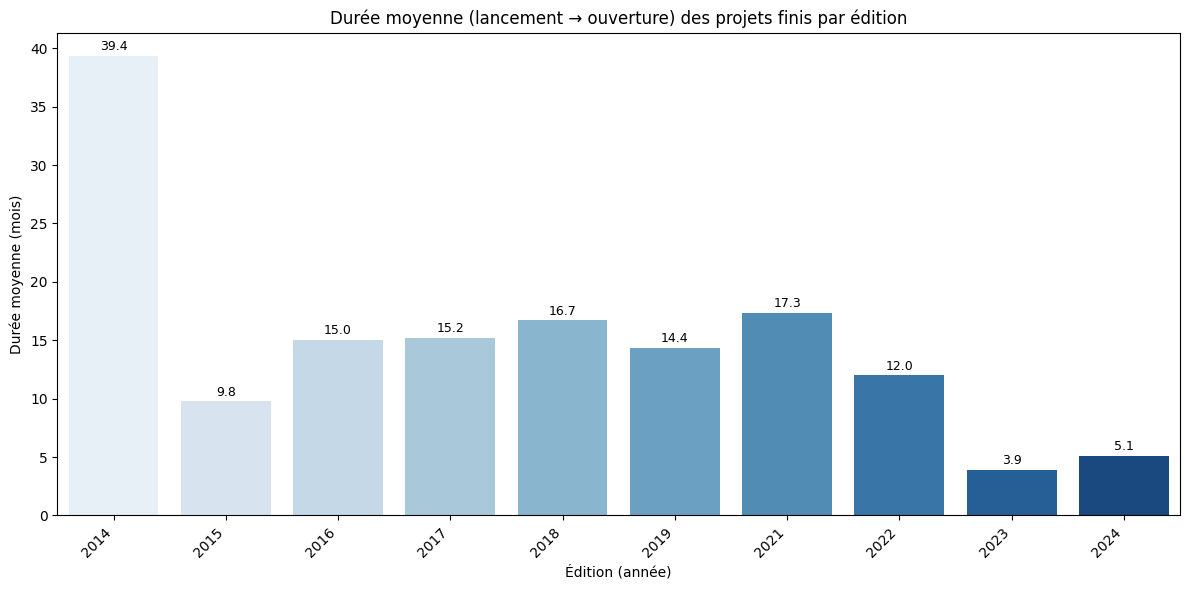

In [ ]:
# 1) Garder uniquement les projets finis
df_fin = df[df["avancement_projet"] == "FIN"].copy()

# 2) Convertir les dates en format datetime
df_fin["lancement_travaux_projet"] = pd.to_datetime(df_fin["lancement_travaux_projet"], errors="coerce")
df_fin["ouverture_projet"] = pd.to_datetime(df_fin["ouverture_projet"], errors="coerce")

# 3) Calculer la durée en mois (ouverture - lancement)
df_fin["duree_mois"] = (df_fin["ouverture_projet"] - df_fin["lancement_travaux_projet"]).dt.days / 30

# Supprimer les lignes où ouverture_projet est manquant ou "Non ouvert"
df_fin = df_fin.dropna(subset=["duree_mois"])

# 4) Calculer la durée moyenne par édition (année)
duree_moyenne_edition = (
    df_fin.groupby("edition")["duree_mois"]
    .mean()
    .reset_index(name="duree_moyenne")
    .sort_values("edition", ascending=True)
)

# 5) Tracer un barplot
plt.figure(figsize=(12,6))
ax = sns.barplot(
    data=duree_moyenne_edition,
    x="edition",
    y="duree_moyenne",
    palette="Blues"
)

plt.title("Durée moyenne (lancement → ouverture) des projets finis par édition")
plt.xlabel("Édition (année)")
plt.ylabel("Durée moyenne (mois)")
plt.xticks(rotation=45, ha="right")

# Ajouter les labels au-dessus des barres
for p in ax.patches:
    ax.annotate(
        f"{p.get_height():.1f}",
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha="center", va="bottom",
        fontsize=9, color="black", xytext=(0, 2),
        textcoords="offset points"
    )

plt.tight_layout()
plt.show()

*   **Analayse et interpretation:** on remarque qu'on 2014 ,les projets prend beaucoup de temps mais de 2015 au 2019 la durée s'est réduit de plus en plus jusqu'on arrive à la période de pandémie ,on n'a pas de projets finis en 2020 mais en 2021 la durée est plus lente en comparaison avec 2019 ,c'est l'effet post-pandémie.Pour les années 2023 et 2024 les moyennes sont bas mais on doit prendre en considération le nombre de projets qui est aussi bas au cours de ces années

#### **La Durée moyenne des projets par thématique:**

/tmp/ipython-input-371511681.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


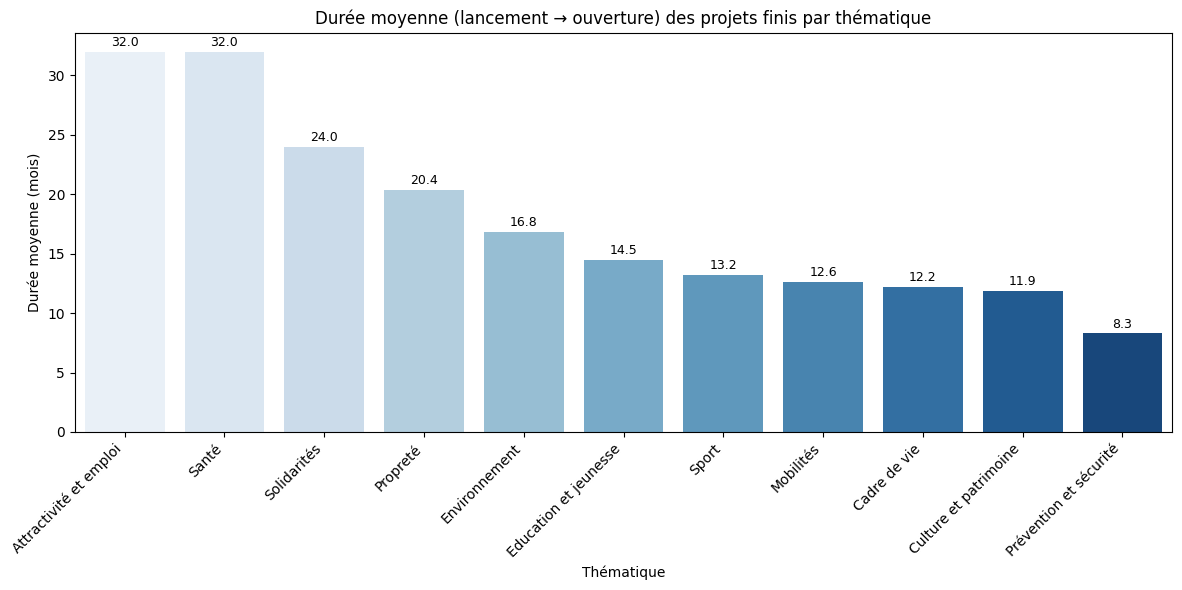

In [ ]:
# 1) Garder uniquement les projets finis
df_fin = df[df["avancement_projet"] == "FIN"].copy()

# 2) Convertir les dates en format datetime
df_fin["lancement_travaux_projet"] = pd.to_datetime(df_fin["lancement_travaux_projet"], errors="coerce")
df_fin["ouverture_projet"] = pd.to_datetime(df_fin["ouverture_projet"], errors="coerce")

# 3) Calculer la durée en mois (ouverture - lancement)
df_fin["duree_mois"] = (df_fin["ouverture_projet"] - df_fin["lancement_travaux_projet"]).dt.days / 30

# ⚠️ Supprimer les lignes où ouverture_projet est manquant ou "Non ouvert"
df_fin = df_fin.dropna(subset=["duree_mois"])

# 4) Calculer la durée moyenne par thématique
duree_moyenne = (
    df_fin.groupby("thematique")["duree_mois"]
    .mean()
    .reset_index(name="duree_moyenne")
    .sort_values("duree_moyenne", ascending=False)
)

# 5) Tracer un barplot
plt.figure(figsize=(12,6))
ax = sns.barplot(
    data=duree_moyenne,
    x="thematique",
    y="duree_moyenne",
    palette="Blues"
)

plt.title("Durée moyenne (lancement → ouverture) des projets finis par thématique")
plt.xlabel("Thématique")
plt.ylabel("Durée moyenne (mois)")
plt.xticks(rotation=45, ha="right")

# Ajouter les labels au-dessus des barres
for p in ax.patches:
    ax.annotate(
        f"{p.get_height():.1f}",
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha="center", va="bottom",
        fontsize=9, color="black", xytext=(0, 2),
        textcoords="offset points"
    )

plt.tight_layout()
plt.show()

*   **Interprétation et analyse:** On remarque que les deux thématiques attractivité et emploi prennent le plus de temps par rapport des autres et ça explique pourquoi les nombres des projets finis pour ces deux thématiques est trés bas ,c'est pourquoi il est nécessaire de changer les stratégies et le traitement des processus de ces projets pour qu'ils soient plus rapide.On trouve aussi que cadre de vie,culture et patrimoine ,prévention et sécurité ont le temps le plus bas et ça apparait clairement au niveau de la section d'analyse par nombres qui montre que ces thématiques ont un nombre importants de projets

#### **La durée moyenne des projets par direction**

/tmp/ipython-input-1144828790.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


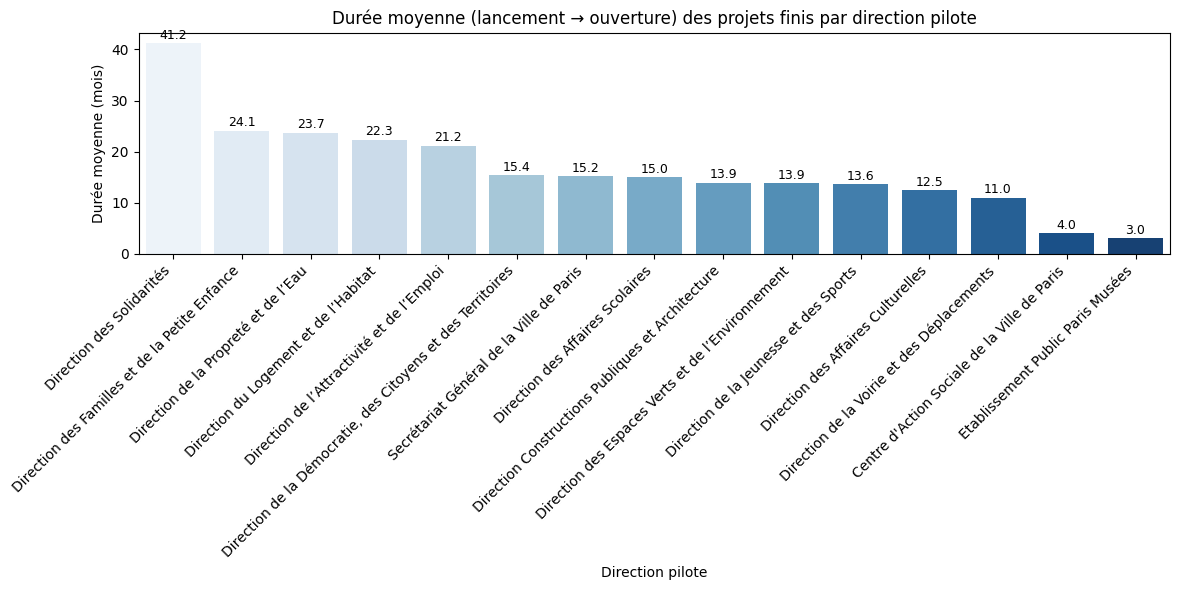

In [ ]:

# 1) Garder uniquement les projets finis
df_fin = df[df["avancement_projet"] == "FIN"].copy()

# 2) Convertir les dates en format datetime
df_fin["lancement_travaux_projet"] = pd.to_datetime(df_fin["lancement_travaux_projet"], errors="coerce")
df_fin["ouverture_projet"] = pd.to_datetime(df_fin["ouverture_projet"], errors="coerce")

# 3) Calculer la durée en mois (ouverture - lancement)
df_fin["duree_mois"] = (df_fin["ouverture_projet"] - df_fin["lancement_travaux_projet"]).dt.days / 30

# Supprimer les lignes où ouverture_projet est manquant ou "Non ouvert"
df_fin = df_fin.dropna(subset=["duree_mois"])

# 4) Calculer la durée moyenne par direction pilote
duree_moyenne_dir = (
    df_fin.groupby("direction_pilote_projet")["duree_mois"]
    .mean()
    .reset_index(name="duree_moyenne")
    .sort_values("duree_moyenne", ascending=False)
)


# 5) Tracer un barplot
plt.figure(figsize=(12,6))
ax = sns.barplot(
    data=duree_moyenne_dir,
    x="direction_pilote_projet",
    y="duree_moyenne",
    palette="Blues"
)

plt.title("Durée moyenne (lancement → ouverture) des projets finis par direction pilote")
plt.xlabel("Direction pilote")
plt.ylabel("Durée moyenne (mois)")
plt.xticks(rotation=45, ha="right")

# ✅ Ajouter les labels au-dessus des barres
for p in ax.patches:
    ax.annotate(
        f"{p.get_height():.1f}",
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha="center", va="bottom",
        fontsize=9, color="black", xytext=(0, 1),
        textcoords="offset points"
    )

plt.tight_layout()
plt.show()

*   **Interpretation et analyse:** on remarque que la direction des solidarités qui pilote les projets favorisant l’inclusion sociale et l’entraide gérent les projets qui prennent légéremment plus de temps et on a deja vu que cette direction n'est ni au top des directions avec les plus projets finis , ni au top des directions qui investis plus de budgets donc les projets de cette direction ne sont pas des megaprojets et d'ou ce retard légéremment supérieur aux autres n'est pas logique et il est nécessaire de plus investiger les causes

#### **La durée moyenne des projets par arrondissement**

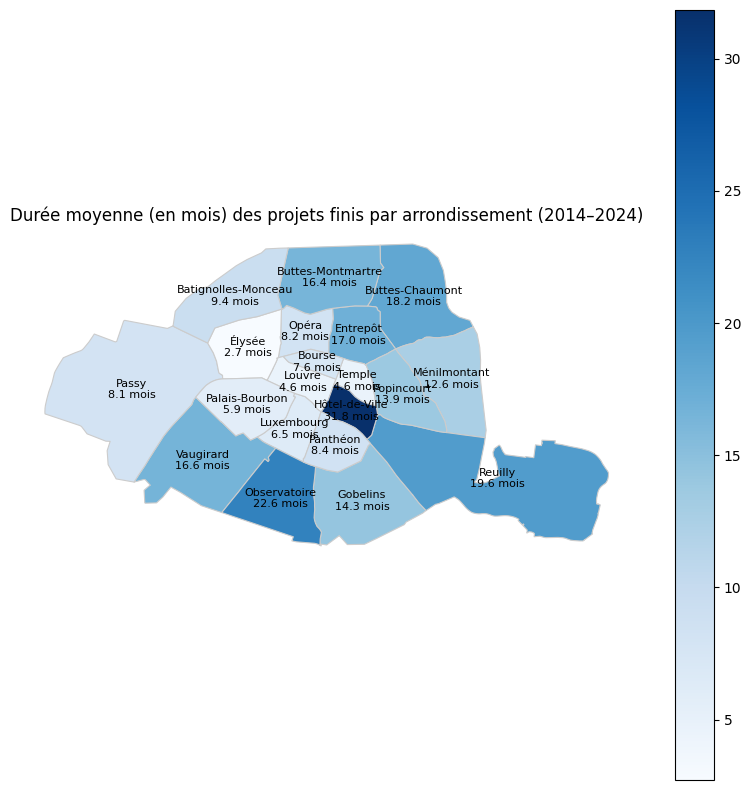

In [ ]:
paris = gpd.read_file(url)

# 2) Transformer 'arrondissement_projet_gagnant' en numéro d'arrondissement (int)
df["arrondissement_projet_gagnant"] = df["arrondissement_projet_gagnant"].astype(str).str[-2:].astype(int)

# 3) Garder uniquement les projets finis
df_fin = df[df["avancement_projet"] == "FIN"].copy()

# 4) Convertir les dates en datetime
df_fin["lancement_travaux_projet"] = pd.to_datetime(df_fin["lancement_travaux_projet"], errors="coerce")
df_fin["ouverture_projet"] = pd.to_datetime(df_fin["ouverture_projet"], errors="coerce")

# 5) Calculer la durée en mois (ouverture - lancement)
df_fin["duree_mois"] = (df_fin["ouverture_projet"] - df_fin["lancement_travaux_projet"]).dt.days / 30

# ⚠️ Supprimer les projets sans ouverture
df_fin = df_fin.dropna(subset=["duree_mois"])

# 6) Calculer la durée moyenne par arrondissement
duree_par_arr = (
    df_fin.groupby("arrondissement_projet_gagnant")["duree_mois"]
    .mean()
    .reset_index(name="duree_moyenne")
)

# 7) Harmoniser les types pour la fusion
paris["c_ar"] = paris["c_ar"].astype(int)
duree_par_arr["arrondissement_projet_gagnant"] = duree_par_arr["arrondissement_projet_gagnant"].astype(int)

# 8) Fusionner avec GeoDataFrame
paris = paris.merge(duree_par_arr, left_on="c_ar", right_on="arrondissement_projet_gagnant", how="left")
paris["duree_moyenne"] = paris["duree_moyenne"].fillna(0)

# 9) Tracer la carte choroplèthe
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
paris.plot(
    column="duree_moyenne",
    cmap="Blues",
    linewidth=0.8,
    ax=ax,
    edgecolor="0.8",
    legend=True
)

plt.title("Durée moyenne (en mois) des projets finis par arrondissement (2014–2024)")
plt.axis("off")

# 10) Ajouter les noms et la durée moyenne au centre
for idx, row in paris.iterrows():
    centroid = row.geometry.centroid
    val = row["duree_moyenne"]
    label_val = f"{val:.1f} mois"
    plt.text(
        centroid.x, centroid.y,
        f"{row['l_aroff']}\n{label_val}",
        ha="center", va="center",
        fontsize=8, color="black"
    )

plt.show()

*   **Interpretation et analyse:** on remarque que l'arrondissement Hotel-de-ville est l'arrondissement dont les projets prennent plus de temps en moyenne ,en se basant sur ce que nous avons interpreter du map des budgets il parait que des megas projets sont investis dans cette zone là vu le budget et le temps,on voit aussi que Louvre a le minimum de moyenne des temps vu que ces projets sont limités et plus probablement ces projets sont des mini-projets qui nécessitent moin de temps.

# 5.**Interprétation générale:**

Cette analyse des projets du budget participatif parisien entre 2014 et 2024 révèle plusieurs tendances et points clés :

1.**Impact des événements externes** : La pandémie de COVID-19 (2020) et la guerre en Ukraine ont eu un impact significatif sur la réalisation des projets. On observe un arrêt des projets finis en 2020 et une diminution notable du nombre et du pourcentage de projets achevés, ainsi que des budgets investis, dans les années suivantes.

2.**Inégalités thématiques et directionnelles** :

Les projets relevant du Cadre de vie, de l'Éducation et jeunesse et de l'Environnement sont les plus nombreux et les plus fréquemment achevés. Ces projets, souvent de moindre envergure et avec des démarches plus flexibles, montrent une meilleure capacité de concrétisation.
À l'inverse, les thématiques comme la Santé et l'Attractivité et emploi affichent un très faible nombre de projets finis et des durées de réalisation plus longues, suggérant des défis structurels ou des stratégies de gestion moins efficaces dans ces domaines. La Direction de la Santé publique et l'Etablissement Public Paris Musées sont particulièrement concernés par ce faible taux de réussite.
3.**Priorités d'investissement :** Bien que la Direction de la Voirie et des Déplacements soit en tête en termes de nombre de projets réalisés, la Direction des Espaces Verts et de l’Environnement montre un investissement budgétaire global plus élevé, indiquant des projets moins nombreux mais plus coûteux dans ce secteur.

4.**Disparités géographiques** : L'analyse par arrondissement met en évidence des disparités importantes. Des arrondissements comme Batignoles-Monceau (17e) et Gobelins (13e) ont un nombre élevé de projets finis, tandis que Louvre (1er) et Élysée (8e) en ont très peu. L'arrondissement Hôtel-de-Ville (4e), malgré un nombre modéré de projets, concentre un budget d'investissement considérablement plus élevé, suggérant la présence de méga-projets nécessitant des budgets et des délais de réalisation importants.

5.**Durée des projets** : La durée moyenne de réalisation des projets finis a fluctué. Après une longue durée en 2014, elle s'est stabilisée entre 2015 et 2019, avant de montrer des signes de ralentissement post-pandémie (2021). Des thématiques comme l'Attractivité et emploi et la Santé, ainsi que la Direction des Solidarités, sont associées à des durées de projet plus longues, ce qui peut expliquer leur moindre taux de concrétisation.

En somme, ce dataset offre une vue détaillée de la dynamique des projets participatifs à Paris, soulignant l'importance des facteurs économiques et sanitaires, les succès des projets de proximité, et la nécessité de réévaluer les stratégies pour les secteurs et les zones sous-performantes afin de garantir une meilleure équité et efficacité dans la réalisation des initiatives citoyennes.

# Merci pour votre attention :)